In [151]:
import os
import random
import sys
import shutil
import tqdm
import os # the main library for operating with folders and files
from shutil import copy2 # for copying file and its metadata to another location in the machine
import xml.etree.ElementTree as ET # for reading a Pascal VOC XML file
import scipy.io # for reading .mat file
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as imgmp
import seaborn as sns
import timeit
import cv2 as cv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

In [152]:
# import utils own functions
import importlib
import utils
importlib.reload(utils)

<module 'utils' from '/media/ismail/Elements/formation/projet7/utils.py'>

In [147]:
import os
import sys
annotations = []
# directory = os.path.dirname(os.path.realpath(sys.argv[0])) #get the directory of your script
for subdir, dirs, files in os.walk('/media/ismail/Elements/formation/projet7/bloodcells/blood_dataset/labels'):
    for filename in files:
        if filename.find('.txt') > 0:
            subdirectoryPath = os.path.relpath(subdir, 'annotations') #get the path to your subdirectory
            filePath = os.path.join(subdirectoryPath, filename) #get the path to your file
            annotations.append(filePath.replace('..','.'))
print(len(annotations))
print(annotations)

11838
['./labels/basophil/BA_421331.txt', './labels/basophil/BA_685720.txt', './labels/basophil/BA_100102.txt', './labels/basophil/BA_101381.txt', './labels/basophil/BA_101611.txt', './labels/basophil/BA_102039.txt', './labels/basophil/BA_102750.txt', './labels/basophil/BA_10387.txt', './labels/basophil/BA_10622.txt', './labels/basophil/BA_107595.txt', './labels/basophil/BA_107876.txt', './labels/basophil/BA_111710.txt', './labels/basophil/BA_112418.txt', './labels/basophil/BA_114542.txt', './labels/basophil/BA_114899.txt', './labels/basophil/BA_115323.txt', './labels/basophil/BA_115777.txt', './labels/basophil/BA_116477.txt', './labels/basophil/BA_119131.txt', './labels/basophil/BA_120278.txt', './labels/basophil/BA_120688.txt', './labels/basophil/BA_121453.txt', './labels/basophil/BA_121897.txt', './labels/basophil/BA_1223.txt', './labels/basophil/BA_124389.txt', './labels/basophil/BA_124620.txt', './labels/basophil/BA_124938.txt', './labels/basophil/BA_126411.txt', './labels/basophi

In [142]:
pwd

'/media/ismail/Elements/formation/projet7/bloodcells/blood_dataset'

In [ ]:
2 0.869444 0.983471 0.261111 0.0275482
2 0.976389 0.19146 0.0472222 0.311295
2 0.909722 0.0647383 0.180556 0.123967
2 0.502778 0.504132 0.316667 0.352617


In [143]:
lymp_list = ['basophil','erythroblast','lymphocyte','neutrophil','eosinophil','monocyte']
class_name_to_id_mapping = {}
for i, elem in enumerate(lymp_list):
    class_name_to_id_mapping[elem] = i
print(class_name_to_id_mapping)

{'basophil': 0, 'erythroblast': 1, 'lymphocyte': 2, 'neutrophil': 3, 'eosinophil': 4, 'monocyte': 5}


In [67]:
print(class_name_to_id_mapping['basophil'])

0


In [144]:
#script renaming the class id with the good class
for subdir, dirs, files in os.walk('/media/ismail/Elements/formation/projet7/bloodcells/blood_dataset/labels'):    
    if(len(subdir.split('/'))>9):
        name = subdir.split('/')[9]
        print(name)
        class_index = class_name_to_id_mapping[name]
        print(class_index)
    for filename in files:
        if filename.find('.txt') > 0:
            subdirectoryPath = os.path.relpath(subdir, 'annotations') #get the path to your subdirectory
            filePath = os.path.join(subdirectoryPath, filename).replace('..','.') #get the path to your file
            print(filePath)
            
            with open(filePath) as f:
                lines = f.readlines()
                output = []
                for line in lines:
                    print(line)
                    output.append(str(class_index)+line[1:len(line)])
            with open(filePath, "w") as f:
                f.writelines(output)               


basophil
0
./labels/basophil/BA_421331.txt
2 0.506944 0.509642 0.413889 0.402204

./labels/basophil/BA_685720.txt
2 0.504167 0.495868 0.352778 0.358127

./labels/basophil/BA_100102.txt
2 0.505556 0.548209 0.311111 0.31405

./labels/basophil/BA_101381.txt
2 0.505556 0.513774 0.377778 0.410468

./labels/basophil/BA_101611.txt
2 0.502778 0.502755 0.377778 0.404959

./labels/basophil/BA_102039.txt
2 0.334722 0.976584 0.158333 0.046832

2 0.494444 0.502755 0.433333 0.438017

./labels/basophil/BA_102750.txt
2 0.502778 0.495868 0.322222 0.352617

./labels/basophil/BA_10387.txt
2 0.5 0.50551 0.327778 0.333333

./labels/basophil/BA_10622.txt
2 0.501389 0.501377 0.369444 0.385675

./labels/basophil/BA_107595.txt
2 0.502778 0.502755 0.388889 0.393939

./labels/basophil/BA_107876.txt
2 0.502778 0.506887 0.422222 0.396694

./labels/basophil/BA_111710.txt
2 0.505556 0.504132 0.344444 0.369146

./labels/basophil/BA_112418.txt
2 0.5 0.502755 0.305556 0.316804

./labels/basophil/BA_114542.txt
2 0.50694

2 0.504167 0.504132 0.336111 0.319559

./labels/basophil/BA_426545.txt
2 0.501389 0.539945 0.391667 0.385675

./labels/basophil/BA_426699.txt
2 0.505556 0.504132 0.322222 0.330579

./labels/basophil/BA_427583.txt
2 0.502778 0.502755 0.355556 0.38292

./labels/basophil/BA_430537.txt
2 0.494444 0.559229 0.455556 0.484848

./labels/basophil/BA_430561.txt
2 0.0375 0.684573 0.075 0.355372

2 0.502778 0.49449 0.35 0.371901

./labels/basophil/BA_433045.txt
2 0.504167 0.498623 0.330556 0.330579

./labels/basophil/BA_433851.txt
2 0.505556 0.508264 0.283333 0.311295

./labels/basophil/BA_434177.txt
2 0.493056 0.5 0.425 0.344353

./labels/basophil/BA_434512.txt
2 0.497222 0.544077 0.372222 0.37741

./labels/basophil/BA_434728.txt
2 0.504167 0.506887 0.397222 0.407714

./labels/basophil/BA_435822.txt
2 0.5 0.509642 0.366667 0.391185

./labels/basophil/BA_435917.txt
2 0.502778 0.502755 0.405556 0.399449

./labels/basophil/BA_436500.txt
2 0.502778 0.498623 0.327778 0.374656

./labels/basophil/BA_437

./labels/basophil/BA_580.txt
2 0.5 0.502755 0.322222 0.300275

./labels/basophil/BA_589260.txt
2 0.497222 0.513774 0.338889 0.526171

./labels/basophil/BA_612971.txt
2 0.501389 0.504132 0.413889 0.4573

./labels/basophil/BA_640005.txt
2 0.504167 0.497245 0.380556 0.415978

./labels/basophil/BA_658251.txt
2 0.504167 0.502755 0.325 0.316804

./labels/basophil/BA_669399.txt
2 0.501389 0.495868 0.397222 0.413223

./labels/basophil/BA_698070.txt
2 0.490278 0.498623 0.436111 0.380165

./labels/basophil/BA_698312.txt
2 0.5 0.506887 0.344444 0.352617

./labels/basophil/BA_699269.txt
2 0.502778 0.501377 0.305556 0.30854

2 0.902778 0.508264 0.194444 0.355372

./labels/basophil/BA_700139.txt
2 0.484722 0.502755 0.319444 0.360882

./labels/basophil/BA_700689.txt
2 0.506944 0.495868 0.408333 0.429752

./labels/basophil/BA_700831.txt
2 0.4875 0.511019 0.358333 0.366391

./labels/basophil/BA_702907.txt
2 0.504167 0.50551 0.330556 0.327824

./labels/basophil/BA_702934.txt
2 0.501389 0.541322 0.341667

2 0.494444 0.506887 0.411111 0.31405

./labels/basophil/BA_956552.txt
2 0.498611 0.508264 0.447222 0.38292

./labels/basophil/BA_980473.txt
2 0.494444 0.5 0.433333 0.432507

./labels/basophil/BA_98051.txt
2 0.502778 0.519284 0.338889 0.338843

./labels/basophil/BA_98152.txt
2 0.504167 0.504132 0.369444 0.402204

./labels/basophil/BA_981874.txt
2 0.506944 0.501377 0.380556 0.402204

./labels/basophil/BA_982393.txt
2 0.452778 0.515152 0.416667 0.578512

./labels/basophil/BA_982740.txt
2 0.502778 0.504132 0.4 0.435262

./labels/basophil/BA_985011.txt
2 0.497222 0.487603 0.366667 0.418733

./labels/basophil/BA_985054.txt
2 0.495833 0.530303 0.397222 0.360882

./labels/basophil/BA_985581.txt
2 0.504167 0.512397 0.469444 0.550964

./labels/basophil/BA_987742.txt
2 0.501366 0.495935 0.325137 0.330623

./labels/basophil/BA_988506.txt
2 0.5125 0.523416 0.391667 0.418733

./labels/basophil/BA_988844.txt
2 0.501389 0.504132 0.369444 0.446281

./labels/basophil/BA_98903.txt
2 0.504167 0.502755 0.3

2 0.501389 0.50551 0.458333 0.410468

./labels/eosinophil/EO_214830.txt
2 0.495833 0.522039 0.452778 0.443526

./labels/eosinophil/EO_215406.txt
2 0.502778 0.504132 0.361111 0.402204

./labels/eosinophil/EO_215530.txt
2 0.502778 0.502755 0.411111 0.399449

./labels/eosinophil/EO_215761.txt
2 0.506944 0.498623 0.413889 0.435262

./labels/eosinophil/EO_216577.txt
2 0.504167 0.566116 0.358333 0.360882

./labels/eosinophil/EO_216756.txt
2 0.506944 0.508264 0.308333 0.399449

./labels/eosinophil/EO_216862.txt
2 0.494444 0.504132 0.422222 0.396694

./labels/eosinophil/EO_217069.txt
2 0.504167 0.504132 0.369444 0.358127

./labels/eosinophil/EO_217076.txt
2 0.620833 0.625344 0.436111 0.407714

2 0.501389 0.274105 0.413889 0.432507

./labels/eosinophil/EO_217802.txt
2 0.5 0.544077 0.4 0.393939

./labels/eosinophil/EO_218066.txt
2 0.5 0.533058 0.377778 0.393939

./labels/eosinophil/EO_218071.txt
2 0.495833 0.490358 0.475 0.435262

./labels/eosinophil/EO_218478.txt
2 0.5 0.502755 0.416667 0.42148

./labels/eosinophil/EO_322036.txt
2 0.501389 0.502755 0.413889 0.38843

./labels/eosinophil/EO_322092.txt
2 0.504167 0.512397 0.375 0.385675

./labels/eosinophil/EO_322492.txt
2 0.573611 0.5 0.369444 0.38292

./labels/eosinophil/EO_322766.txt
2 0.504167 0.504132 0.358333 0.358127

2 0.477778 0.126722 0.344444 0.253444

./labels/eosinophil/EO_322937.txt
2 0.502778 0.50551 0.383333 0.410468

./labels/eosinophil/EO_323058.txt
2 0.498611 0.522039 0.419444 0.415978

./labels/eosinophil/EO_32318.txt
2 0.505556 0.502755 0.355556 0.421488

./labels/eosinophil/EO_323763.txt
2 0.502778 0.53168 0.366667 0.424242

./labels/eosinophil/EO_323955.txt
2 0.497222 0.512397 0.405556 0.396694

./labels/eosinophil/EO_324141.txt
2 0.505556 0.501377 0.366667 0.363636

./labels/eosinophil/EO_324172.txt
2 0.466667 0.559229 0.372222 0.385675

./labels/eosinophil/EO_324596.txt
2 0.498611 0.636364 0.358333 0.352617

./labels/eosinophil/EO_324837.txt
2 0.502778 0.50551 0.405556 0.438017

./labels/eosinophil/EO_325

2 0.498611 0.519284 0.447222 0.443526

./labels/eosinophil/EO_391732.txt
2 0.494444 0.502755 0.427778 0.438017

./labels/eosinophil/EO_39294.txt
2 0.497222 0.522039 0.411111 0.421488

./labels/eosinophil/EO_392948.txt
2 0.495833 0.50551 0.447222 0.421488

./labels/eosinophil/EO_393434.txt
2 0.501389 0.504132 0.397222 0.402204

./labels/eosinophil/EO_393793.txt
2 0.505556 0.482094 0.422222 0.429752

./labels/eosinophil/EO_393795.txt
2 0.494444 0.453168 0.394444 0.432507

./labels/eosinophil/EO_3941.txt
2 0.501389 0.548209 0.441667 0.424242

./labels/eosinophil/EO_394346.txt
2 0.493056 0.509642 0.441667 0.595041

./labels/eosinophil/EO_394672.txt
2 0.494444 0.50551 0.394444 0.476584

./labels/eosinophil/EO_39469.txt
2 0.504167 0.508264 0.341667 0.366391

./labels/eosinophil/EO_395189.txt
2 0.502778 0.508264 0.444444 0.454545

./labels/eosinophil/EO_396711.txt
2 0.497222 0.511019 0.377778 0.404959

./labels/eosinophil/EO_396981.txt
2 0.472222 0.955923 0.116667 0.0826446

2 0.501389 0.5027

2 0.5 0.522039 0.355556 0.371901

./labels/eosinophil/EO_514883.txt
2 0.502778 0.497245 0.311111 0.349862

./labels/eosinophil/EO_515564.txt
2 0.505556 0.449036 0.361111 0.374656

./labels/eosinophil/EO_515602.txt
2 0.501389 0.502755 0.408333 0.426997

./labels/eosinophil/EO_51563.txt
2 0.502778 0.506887 0.372222 0.369146

./labels/eosinophil/EO_515942.txt
2 0.504167 0.511019 0.452778 0.471074

./labels/eosinophil/EO_516058.txt
2 0.495833 0.498623 0.413889 0.429752

./labels/eosinophil/EO_516265.txt
2 0.495833 0.50551 0.402778 0.426997

./labels/eosinophil/EO_516632.txt
2 0.491667 0.522039 0.444444 0.426997

./labels/eosinophil/EO_516640.txt
2 0.530556 0.504132 0.416667 0.4573

./labels/eosinophil/EO_516662.txt
2 0.504167 0.519284 0.575 0.652893

./labels/eosinophil/EO_517855.txt
2 0.501389 0.506887 0.386111 0.418733

./labels/eosinophil/EO_518015.txt
2 0.505556 0.504132 0.361111 0.352617

./labels/eosinophil/EO_51829.txt
2 0.505556 0.50551 0.416667 0.415978

./labels/eosinophil/EO_519

./labels/eosinophil/EO_631978.txt
2 0.502778 0.502755 0.405556 0.366391

./labels/eosinophil/EO_632079.txt
2 0.505556 0.502755 0.361111 0.360882

./labels/eosinophil/EO_633307.txt
2 0.494444 0.541322 0.422222 0.415978

./labels/eosinophil/EO_633427.txt
2 0.502778 0.501377 0.366667 0.385675

./labels/eosinophil/EO_633545.txt
2 0.497222 0.530303 0.433333 0.443526

./labels/eosinophil/EO_633597.txt
2 0.5125 0.527548 0.391667 0.410468

./labels/eosinophil/EO_633663.txt
2 0.568056 0.539945 0.430556 0.451791

./labels/eosinophil/EO_634127.txt
2 0.511111 0.49449 0.372222 0.360882

./labels/eosinophil/EO_634711.txt
2 0.231944 0.703857 0.391667 0.426997

2 0.809722 0.464187 0.369444 0.37741

./labels/eosinophil/EO_634772.txt
2 0.498611 0.50551 0.430556 0.415978

./labels/eosinophil/EO_641941.txt
2 0.502778 0.501377 0.394444 0.396694

./labels/eosinophil/EO_642065.txt
2 0.502778 0.501377 0.372222 0.380165

./labels/eosinophil/EO_642190.txt
2 0.963889 0.601928 0.0722222 0.37741

2 0.143056 0.0537

./labels/eosinophil/EO_780969.txt
2 0.502778 0.50551 0.361111 0.410468

./labels/eosinophil/EO_781146.txt
2 0.497222 0.552342 0.361111 0.38292

./labels/eosinophil/EO_781274.txt
2 0.504098 0.495935 0.363388 0.346883

./labels/eosinophil/EO_781562.txt
2 0.502778 0.504132 0.433333 0.413223

./labels/eosinophil/EO_78159.txt
2 0.501389 0.497245 0.352778 0.349862

./labels/eosinophil/EO_781608.txt
2 0.501389 0.504132 0.397222 0.402204

./labels/eosinophil/EO_781911.txt
2 0.502778 0.5 0.427778 0.432507

./labels/eosinophil/EO_781920.txt
2 0.5 0.571625 0.433333 0.438017

./labels/eosinophil/EO_782734.txt
2 0.502778 0.504132 0.405556 0.440771

./labels/eosinophil/EO_782907.txt
2 0.501389 0.502755 0.425 0.438017

./labels/eosinophil/EO_783064.txt
2 0.486339 0.506775 0.377049 0.390244

./labels/eosinophil/EO_78307.txt
2 0.504167 0.512397 0.408333 0.402204

./labels/eosinophil/EO_783136.txt
2 0.501389 0.502755 0.380556 0.360882

./labels/eosinophil/EO_783793.txt
2 0.506944 0.480716 0.408333 0.410

./labels/eosinophil/EO_909235.txt
2 0.502778 0.504132 0.422222 0.418733

./labels/eosinophil/EO_909502.txt
2 0.569444 0.515152 0.377778 0.385675

./labels/eosinophil/EO_909845.txt
2 0.5 0.533058 0.355556 0.344353

./labels/eosinophil/EO_910.txt
2 0.45 0.471074 0.366667 0.391185

./labels/eosinophil/EO_910069.txt
2 0.497222 0.504132 0.394444 0.402204

./labels/eosinophil/EO_910337.txt
2 0.505556 0.504132 0.355556 0.352617

./labels/eosinophil/EO_910349.txt
2 0.504167 0.513774 0.391667 0.393939

./labels/eosinophil/EO_910358.txt
2 0.5 0.545455 0.383333 0.374656

./labels/eosinophil/EO_910529.txt
2 0.501389 0.475207 0.391667 0.344353

./labels/eosinophil/EO_910585.txt
2 0.501389 0.504132 0.375 0.380165

./labels/eosinophil/EO_911067.txt
2 0.495833 0.50551 0.452778 0.482094

./labels/eosinophil/EO_911439.txt
2 0.495833 0.512397 0.397222 0.391185

./labels/eosinophil/EO_911566.txt
2 0.501389 0.497245 0.480556 0.504132

./labels/eosinophil/EO_912327.txt
2 0.502778 0.5 0.422222 0.432507

./la

2 0.502778 0.495868 0.227778 0.209366

./labels/erythroblast/ERB_159653.txt
2 0.502778 0.588154 0.333333 0.360882

./labels/erythroblast/ERB_160614.txt
2 0.581944 0.0261708 0.302778 0.0523416

2 0.504167 0.502755 0.308333 0.300275

./labels/erythroblast/ERB_16164.txt
2 0.501389 0.552342 0.252778 0.289256

./labels/erythroblast/ERB_161814.txt
2 0.501389 0.501377 0.208333 0.269972

./labels/erythroblast/ERB_162429.txt
2 0.0972222 0.619835 0.194444 0.258953

2 0.501389 0.506887 0.269444 0.292011

./labels/erythroblast/ERB_162713.txt
2 0.495833 0.504132 0.263889 0.242424

./labels/erythroblast/ERB_163499.txt
2 0.5 0.501377 0.25 0.286501

./labels/erythroblast/ERB_163533.txt
2 0.5 0.498623 0.305556 0.352617

./labels/erythroblast/ERB_166408.txt
2 0.505556 0.498623 0.322222 0.264463

./labels/erythroblast/ERB_166518.txt
2 0.472222 0.50551 0.227778 0.23416

./labels/erythroblast/ERB_167870.txt
2 0.5 0.495868 0.272222 0.269972

./labels/erythroblast/ERB_168152.txt
2 0.502778 0.504132 0.333333 

2 0.502778 0.506887 0.327778 0.319559

./labels/erythroblast/ERB_421850.txt
2 0.501389 0.502755 0.291667 0.294766

./labels/erythroblast/ERB_422338.txt
2 0.502778 0.502755 0.261111 0.278237

./labels/erythroblast/ERB_423056.txt
2 0.508333 0.502755 0.294444 0.289256

2 0.245833 0.413223 0.291667 0.30854

2 0.0986111 0.573003 0.197222 0.297521

./labels/erythroblast/ERB_42309.txt
2 0.348611 0.539945 0.286111 0.341598

2 0.638889 0.581267 0.327778 0.30854

./labels/erythroblast/ERB_423273.txt
2 0.497222 0.502755 0.3 0.305785

./labels/erythroblast/ERB_423288.txt
2 0.865278 0.946281 0.258333 0.107438

2 0.616667 0.833333 0.377778 0.333333

2 0.498611 0.530303 0.297222 0.311295

./labels/erythroblast/ERB_423428.txt
2 0.501389 0.498623 0.247222 0.220386

./labels/erythroblast/ERB_424014.txt
2 0.441667 0.903581 0.333333 0.192837

2 0.502778 0.495868 0.266667 0.264463

./labels/erythroblast/ERB_424865.txt
2 0.502778 0.501377 0.261111 0.292011

./labels/erythroblast/ERB_424947.txt
2 0.501389 0.

./labels/erythroblast/ERB_65923.txt
2 0.133333 0.884298 0.266667 0.231405

2 0.504167 0.497245 0.286111 0.305785

./labels/erythroblast/ERB_659279.txt
2 0.504167 0.502755 0.336111 0.316804

./labels/erythroblast/ERB_660935.txt
2 0.497222 0.502755 0.372222 0.371901

./labels/erythroblast/ERB_661063.txt
2 0.508333 0.502778 0.261111 0.255556

./labels/erythroblast/ERB_661277.txt
2 0.504167 0.501377 0.241667 0.280992

./labels/erythroblast/ERB_661374.txt
2 0.504167 0.495868 0.308333 0.269972

./labels/erythroblast/ERB_662329.txt
2 0.501389 0.504132 0.397222 0.396694

./labels/erythroblast/ERB_662534.txt
2 0.5 0.502755 0.405556 0.38843

./labels/erythroblast/ERB_663085.txt
2 0.502778 0.501377 0.25 0.247934

./labels/erythroblast/ERB_663108.txt
2 0.865278 0.809917 0.258333 0.297521

2 0.502778 0.567493 0.338889 0.358127

./labels/erythroblast/ERB_66502.txt
2 0.5 0.502755 0.277778 0.22865

./labels/erythroblast/ERB_665333.txt
2 0.497222 0.501377 0.222222 0.253444

./labels/erythroblast/ERB_66

./labels/erythroblast/ERB_889140.txt
2 0.506944 0.504132 0.336111 0.358127

./labels/erythroblast/ERB_889605.txt
2 0.501389 0.501377 0.280556 0.247934

./labels/erythroblast/ERB_890222.txt
2 0.498611 0.50551 0.358333 0.316804

./labels/erythroblast/ERB_890393.txt
2 0.777778 0.119835 0.266667 0.239669

2 0.4875 0.486226 0.386111 0.38843

./labels/erythroblast/ERB_890489.txt
2 0.501389 0.465565 0.180556 0.30854

./labels/erythroblast/ERB_890546.txt
2 0.475 0.424242 0.35 0.369146

./labels/erythroblast/ERB_890863.txt
2 0.495833 0.5 0.219444 0.289256

./labels/erythroblast/ERB_891376.txt
2 0.504167 0.508264 0.263889 0.239669

2 0.0791667 0.702479 0.158333 0.286501

./labels/erythroblast/ERB_892000.txt
2 0.504167 0.50551 0.330556 0.311295

./labels/erythroblast/ERB_892592.txt
2 0.502778 0.501377 0.272222 0.275482

./labels/erythroblast/ERB_893069.txt
2 0.504167 0.502755 0.280556 0.283747

./labels/erythroblast/ERB_893674.txt
2 0.508333 0.393939 0.244444 0.374656

./labels/erythroblast/ERB_8

./labels/lymphocyte/LY_283524.txt
2 0.5 0.502755 0.266667 0.283747

./labels/lymphocyte/LY_283526.txt
2 0.504167 0.504132 0.297222 0.30854

./labels/lymphocyte/LY_284207.txt
2 0.502778 0.497245 0.266667 0.300275

./labels/lymphocyte/LY_28473.txt
2 0.502778 0.501377 0.266667 0.253444

2 0.851389 0.534435 0.291667 0.319559

./labels/lymphocyte/LY_284797.txt
2 0.493056 0.5 0.319444 0.300275

./labels/lymphocyte/LY_284856.txt
2 0.502778 0.515152 0.266667 0.269972

./labels/lymphocyte/LY_285165.txt
2 0.5 0.519284 0.327778 0.333333

./labels/lymphocyte/LY_286569.txt
2 0.5 0.502755 0.294444 0.289256

./labels/lymphocyte/LY_286920.txt
2 0.502778 0.502755 0.244444 0.250689

./labels/lymphocyte/LY_287479.txt
2 0.491803 0.51355 0.295082 0.289973

./labels/lymphocyte/LY_288132.txt
2 0.502778 0.50551 0.316667 0.438017

./labels/lymphocyte/LY_288197.txt
2 0.504167 0.5 0.319444 0.333333

./labels/lymphocyte/LY_289164.txt
2 0.502778 0.497245 0.333333 0.349862

./labels/lymphocyte/LY_289402.txt
2 0.491

./labels/lymphocyte/LY_609401.txt
2 0.502778 0.502755 0.227778 0.22865

./labels/lymphocyte/LY_609443.txt
2 0.504167 0.5 0.313889 0.305785

./labels/lymphocyte/LY_612323.txt
2 0.502778 0.498623 0.327778 0.341598

./labels/lymphocyte/LY_612600.txt
2 0.504167 0.5 0.291667 0.267218

./labels/lymphocyte/LY_613198.txt
2 0.502732 0.411924 0.256831 0.265583

./labels/lymphocyte/LY_613623.txt
2 0.504167 0.497245 0.263889 0.261708

./labels/lymphocyte/LY_613672.txt
2 0.504167 0.5 0.252778 0.267218

./labels/lymphocyte/LY_613767.txt
2 0.498611 0.5 0.275 0.300275

./labels/lymphocyte/LY_614956.txt
2 0.501389 0.506887 0.308333 0.319559

./labels/lymphocyte/LY_616024.txt
2 0.490278 0.5 0.275 0.272727

./labels/lymphocyte/LY_617499.txt
2 0.5 0.504132 0.266667 0.253444

./labels/lymphocyte/LY_618017.txt
2 0.502778 0.502755 0.366667 0.360882

./labels/lymphocyte/LY_618428.txt
2 0.501389 0.504132 0.269444 0.336088

./labels/lymphocyte/LY_619039.txt
2 0.190278 0.5 0.302778 0.316804

2 0.501389 0.557851 

./labels/lymphocyte/LY_872377.txt
2 0.498611 0.549587 0.252778 0.272727

./labels/lymphocyte/LY_872921.txt
2 0.502778 0.493113 0.277778 0.280992

./labels/lymphocyte/LY_872934.txt
2 0.501389 0.498623 0.280556 0.264463

./labels/lymphocyte/LY_873168.txt
2 0.505556 0.502755 0.316667 0.305785

./labels/lymphocyte/LY_873630.txt
2 0.505556 0.504132 0.261111 0.242424

./labels/lymphocyte/LY_874360.txt
2 0.502778 0.506887 0.3 0.31405

./labels/lymphocyte/LY_874739.txt
2 0.5 0.501377 0.238889 0.242424

./labels/lymphocyte/LY_874823.txt
2 0.505556 0.501377 0.288889 0.275482

./labels/lymphocyte/LY_875286.txt
2 0.504167 0.5 0.258333 0.256198

./labels/lymphocyte/LY_875452.txt
2 0.501389 0.501377 0.341667 0.347107

./labels/lymphocyte/LY_875657.txt
2 0.501389 0.522039 0.258333 0.294766

./labels/lymphocyte/LY_875873.txt
2 0.498611 0.50551 0.313889 0.322314

./labels/lymphocyte/LY_877055.txt
2 0.502778 0.5 0.277778 0.272727

./labels/lymphocyte/LY_87818.txt
2 0.502778 0.506887 0.283333 0.286501

.

2 0.501389 0.516529 0.408333 0.421488

./labels/monocyte/MO_231492.txt
2 0.501389 0.49449 0.469444 0.487603

./labels/monocyte/MO_231678.txt
2 0.501389 0.515152 0.441667 0.495868

./labels/monocyte/MO_23282.txt
2 0.504167 0.504132 0.441667 0.407714

./labels/monocyte/MO_234193.txt
2 0.495833 0.5 0.441667 0.432507

./labels/monocyte/MO_235578.txt
2 0.504167 0.504132 0.363889 0.385675

./labels/monocyte/MO_235817.txt
2 0.501389 0.502755 0.425 0.421488

./labels/monocyte/MO_236347.txt
2 0.509722 0.495868 0.436111 0.528926

./labels/monocyte/MO_23768.txt
2 0.5 0.506887 0.45 0.4573

./labels/monocyte/MO_23775.txt
2 0.502778 0.502755 0.411111 0.38843

./labels/monocyte/MO_237869.txt
2 0.505556 0.497245 0.366667 0.53168

./labels/monocyte/MO_238063.txt
2 0.490278 0.520661 0.475 0.62259

./labels/monocyte/MO_238900.txt
2 0.493056 0.498623 0.552778 0.534435

./labels/monocyte/MO_238906.txt
2 0.501389 0.524793 0.480556 0.53168

./labels/monocyte/MO_239521.txt
2 0.5 0.495868 0.483333 0.517906

./

2 0.497222 0.538567 0.516667 0.53168

./labels/monocyte/MO_501501.txt
2 0.501389 0.504132 0.397222 0.429752

./labels/monocyte/MO_502212.txt
2 0.505556 0.498623 0.477778 0.495868

./labels/monocyte/MO_503134.txt
2 0.509722 0.480716 0.436111 0.763085

./labels/monocyte/MO_503237.txt
2 0.5 0.501377 0.411111 0.424242

./labels/monocyte/MO_503447.txt
2 0.491667 0.522039 0.433333 0.647383

./labels/monocyte/MO_504276.txt
2 0.504167 0.533058 0.441667 0.53719

./labels/monocyte/MO_505288.txt
2 0.505556 0.511019 0.6 0.603306

./labels/monocyte/MO_506372.txt
2 0.505556 0.504132 0.477778 0.534435

./labels/monocyte/MO_506752.txt
2 0.501389 0.502755 0.502778 0.785124

./labels/monocyte/MO_507377.txt
2 0.5 0.506887 0.361111 0.402204

./labels/monocyte/MO_507386.txt
2 0.502778 0.50551 0.455556 0.493113

./labels/monocyte/MO_507433.txt
2 0.495833 0.508264 0.375 0.460055

./labels/monocyte/MO_508461.txt
2 0.611111 0.438017 0.466667 0.573003

2 0.186111 0.834711 0.372222 0.330579

./labels/monocyte/MO

2 0.505556 0.508264 0.411111 0.586777

./labels/monocyte/MO_756261.txt
2 0.502778 0.495868 0.477778 0.506887

./labels/monocyte/MO_757550.txt
2 0.501389 0.5 0.397222 0.432507

./labels/monocyte/MO_7582.txt
2 0.502778 0.506887 0.472222 0.473829

./labels/monocyte/MO_758331.txt
2 0.502778 0.495868 0.472222 0.46832

./labels/monocyte/MO_759392.txt
2 0.0861111 0.929752 0.172222 0.134986

2 0.5125 0.523416 0.436111 0.61157

./labels/monocyte/MO_759794.txt
2 0.498611 0.506887 0.397222 0.76584

./labels/monocyte/MO_760420.txt
2 0.490278 0.50551 0.463889 0.476584

./labels/monocyte/MO_76055.txt
2 0.494444 0.495868 0.477778 0.512397

./labels/monocyte/MO_761438.txt
2 0.495833 0.513774 0.402778 0.807163

./labels/monocyte/MO_761533.txt
2 0.506944 0.516529 0.491667 0.548209

./labels/monocyte/MO_76193.txt
2 0.5125 0.553719 0.413889 0.523416

./labels/monocyte/MO_762261.txt
2 0.497222 0.498623 0.416667 0.424242

./labels/monocyte/MO_762290.txt
2 0.502778 0.495868 0.494444 0.523416

./labels/monocy

./labels/neutrophil/BNE_12387.txt
2 0.498611 0.522039 0.347222 0.371901

./labels/neutrophil/BNE_12405.txt
2 0.494444 0.506887 0.405556 0.424242

./labels/neutrophil/BNE_124082.txt
2 0.498611 0.497245 0.397222 0.404959

./labels/neutrophil/BNE_124086.txt
2 0.5 0.501377 0.405556 0.435262

./labels/neutrophil/BNE_125415.txt
2 0.5 0.523416 0.411111 0.435262

./labels/neutrophil/BNE_125604.txt
2 0.506944 0.504132 0.375 0.352617

./labels/neutrophil/BNE_125774.txt
2 0.498611 0.511019 0.363889 0.360882

./labels/neutrophil/BNE_125889.txt
2 0.501389 0.501377 0.425 0.418733

./labels/neutrophil/BNE_126456.txt
2 0.501389 0.502755 0.458333 0.449036

./labels/neutrophil/BNE_126596.txt
2 0.498611 0.513774 0.347222 0.371901

./labels/neutrophil/BNE_127951.txt
2 0.501389 0.61157 0.341667 0.341598

./labels/neutrophil/BNE_128335.txt
2 0.495833 0.506887 0.430556 0.440771

./labels/neutrophil/BNE_12839.txt
2 0.5 0.501377 0.394444 0.385675

./labels/neutrophil/BNE_128562.txt
2 0.506944 0.533058 0.380556

2 0.502778 0.50551 0.422222 0.421488

./labels/neutrophil/BNE_340421.txt
2 0.497222 0.504132 0.366667 0.385675

./labels/neutrophil/BNE_34065.txt
2 0.505556 0.50551 0.405556 0.449036

./labels/neutrophil/BNE_340725.txt
2 0.497222 0.498623 0.411111 0.435262

./labels/neutrophil/BNE_340751.txt
2 0.506944 0.530303 0.397222 0.415978

./labels/neutrophil/BNE_341487.txt
2 0.495833 0.504132 0.441667 0.46281

./labels/neutrophil/BNE_341561.txt
2 0.495833 0.504132 0.363889 0.369146

./labels/neutrophil/BNE_341589.txt
2 0.505556 0.497245 0.45 0.476584

./labels/neutrophil/BNE_341802.txt
2 0.494444 0.300275 0.405556 0.407714

2 0.495833 0.677686 0.363889 0.352617

./labels/neutrophil/BNE_342062.txt
2 0.5 0.502755 0.366667 0.38843

./labels/neutrophil/BNE_342517.txt
2 0.497222 0.497245 0.422222 0.443526

./labels/neutrophil/BNE_342806.txt
2 0.502778 0.50551 0.411111 0.399449

./labels/neutrophil/BNE_342978.txt
2 0.504167 0.502755 0.369444 0.360882

./labels/neutrophil/BNE_343542.txt
2 0.495833 0.5

2 0.497222 0.504132 0.377778 0.413223

./labels/neutrophil/BNE_436813.txt
2 0.505556 0.502755 0.438889 0.426997

./labels/neutrophil/BNE_436871.txt
2 0.502778 0.502755 0.344444 0.415978

./labels/neutrophil/BNE_437992.txt
2 0.498611 0.506887 0.397222 0.402204

./labels/neutrophil/BNE_438120.txt
2 0.501389 0.502755 0.341667 0.443526

./labels/neutrophil/BNE_438239.txt
2 0.498611 0.5427 0.391667 0.396694

./labels/neutrophil/BNE_438674.txt
2 0.498611 0.502755 0.297222 0.371901

./labels/neutrophil/BNE_438952.txt
2 0.497222 0.522039 0.377778 0.37741

./labels/neutrophil/BNE_439737.txt
2 0.502778 0.502755 0.388889 0.404959

./labels/neutrophil/BNE_441101.txt
2 0.504167 0.498623 0.419444 0.435262

2 0.704167 0.826446 0.430556 0.347107

./labels/neutrophil/BNE_44167.txt
2 0.5 0.504132 0.377778 0.391185

./labels/neutrophil/BNE_442322.txt
2 0.498611 0.504132 0.397222 0.407714

./labels/neutrophil/BNE_44328.txt
2 0.497222 0.50551 0.366667 0.404959

./labels/neutrophil/BNE_443350.txt
2 0.498611

./labels/neutrophil/BNE_613862.txt
2 0.5 0.502755 0.377778 0.360882

./labels/neutrophil/BNE_614370.txt
2 0.504167 0.497245 0.352778 0.366391

./labels/neutrophil/BNE_615813.txt
2 0.501389 0.504132 0.397222 0.380165

./labels/neutrophil/BNE_616743.txt
2 0.502778 0.50551 0.366667 0.38843

./labels/neutrophil/BNE_617269.txt
2 0.505556 0.495868 0.438889 0.451791

./labels/neutrophil/BNE_617577.txt
2 0.504167 0.502755 0.380556 0.349862

./labels/neutrophil/BNE_618269.txt
2 0.501389 0.504132 0.391667 0.446281

./labels/neutrophil/BNE_618678.txt
2 0.497222 0.502755 0.422222 0.432507

./labels/neutrophil/BNE_619060.txt
2 0.501389 0.50551 0.363889 0.471074

./labels/neutrophil/BNE_620218.txt
2 0.502778 0.502755 0.388889 0.371901

./labels/neutrophil/BNE_620708.txt
2 0.506944 0.497245 0.480556 0.449036

./labels/neutrophil/BNE_620809.txt
2 0.497222 0.5 0.422222 0.449036

./labels/neutrophil/BNE_622154.txt
2 0.495833 0.504132 0.369444 0.429752

./labels/neutrophil/BNE_623314.txt
2 0.504167 0.502

2 0.502778 0.501377 0.377778 0.380165

./labels/neutrophil/BNE_900832.txt
2 0.504167 0.502755 0.341667 0.338843

./labels/neutrophil/BNE_901057.txt
2 0.494444 0.504132 0.394444 0.4573

./labels/neutrophil/BNE_901137.txt
2 0.501389 0.504132 0.408333 0.451791

./labels/neutrophil/BNE_901592.txt
2 0.504167 0.501377 0.380556 0.385675

./labels/neutrophil/BNE_903013.txt
2 0.502778 0.502755 0.372222 0.366391

./labels/neutrophil/BNE_903293.txt
2 0.501389 0.502755 0.363889 0.371901

./labels/neutrophil/BNE_903373.txt
2 0.497222 0.498623 0.472222 0.495868

./labels/neutrophil/BNE_903428.txt
2 0.547222 0.502755 0.327778 0.355372

./labels/neutrophil/BNE_903821.txt
2 0.498611 0.504132 0.480556 0.495868

./labels/neutrophil/BNE_903935.txt
2 0.5 0.502755 0.405556 0.399449

./labels/neutrophil/BNE_905051.txt
2 0.502778 0.502755 0.433333 0.410468

./labels/neutrophil/BNE_905474.txt
2 0.504167 0.556474 0.408333 0.402204

./labels/neutrophil/BNE_905950.txt
2 0.497222 0.50551 0.4 0.404959

./labels/neu

2 0.504167 0.49449 0.469444 0.509642

./labels/neutrophil/SNE_185829.txt
2 0.494444 0.50551 0.394444 0.476584

./labels/neutrophil/SNE_187967.txt
2 0.501389 0.520661 0.397222 0.402204

./labels/neutrophil/SNE_189373.txt
2 0.504167 0.495868 0.458333 0.479339

./labels/neutrophil/SNE_18961.txt
2 0.502778 0.498623 0.383333 0.347107

./labels/neutrophil/SNE_189642.txt
2 0.502778 0.50551 0.377778 0.438017

./labels/neutrophil/SNE_189684.txt
2 0.494444 0.50551 0.4 0.415978

./labels/neutrophil/SNE_189918.txt
2 0.502778 0.550964 0.411111 0.402204

./labels/neutrophil/SNE_189979.txt
2 0.243056 0.190083 0.475 0.374656

2 0.501389 0.506887 0.419444 0.4573

./labels/neutrophil/SNE_190191.txt
2 0.498611 0.522039 0.430556 0.449036

./labels/neutrophil/SNE_19025.txt
2 0.502778 0.50551 0.4 0.449036

./labels/neutrophil/SNE_190775.txt
2 0.5 0.50551 0.361111 0.38292

./labels/neutrophil/SNE_191339.txt
2 0.495833 0.520661 0.425 0.446281

./labels/neutrophil/BNE_9763.txt
2 0.506944 0.527548 0.408333 0.41

./labels/neutrophil/SNE_404231.txt
2 0.502778 0.504132 0.383333 0.396694

./labels/neutrophil/SNE_404265.txt
2 0.518056 0.508264 0.302778 0.779614

./labels/neutrophil/SNE_404595.txt
2 0.497222 0.504132 0.433333 0.418733

./labels/neutrophil/SNE_405383.txt
2 0.498611 0.506887 0.469444 0.490358

./labels/neutrophil/SNE_405975.txt
2 0.497222 0.498623 0.427778 0.435262

./labels/neutrophil/SNE_406359.txt
2 0.5 0.504132 0.405556 0.402204

./labels/neutrophil/SNE_406546.txt
2 0.501389 0.504132 0.341667 0.358127

./labels/neutrophil/SNE_406667.txt
2 0.498611 0.524793 0.380556 0.493113

./labels/neutrophil/SNE_406702.txt
2 0.501389 0.501377 0.363889 0.369146

./labels/neutrophil/SNE_407809.txt
2 0.501389 0.50551 0.330556 0.371901

./labels/neutrophil/SNE_408047.txt
2 0.501389 0.504132 0.330556 0.46832

./labels/neutrophil/SNE_409307.txt
2 0.493056 0.504132 0.419444 0.440771

./labels/neutrophil/SNE_409624.txt
2 0.494444 0.50551 0.438889 0.487603

./labels/neutrophil/SNE_411413.txt
2 0.497222 

2 0.502778 0.502755 0.372222 0.366391

./labels/neutrophil/SNE_650929.txt
2 0.505556 0.497245 0.4 0.476584

./labels/neutrophil/SNE_651622.txt
2 0.502778 0.49449 0.35 0.344353

./labels/neutrophil/SNE_651628.txt
2 0.5 0.552342 0.377778 0.404959

./labels/neutrophil/SNE_651779.txt
2 0.495833 0.501377 0.413889 0.429752

./labels/neutrophil/SNE_653262.txt
2 0.498611 0.50551 0.391667 0.421488

./labels/neutrophil/SNE_65396.txt
2 0.498611 0.501377 0.391667 0.396694

./labels/neutrophil/SNE_655671.txt
2 0.491667 0.50551 0.416667 0.460055

./labels/neutrophil/SNE_655718.txt
2 0.497222 0.504132 0.422222 0.440771

./labels/neutrophil/SNE_65575.txt
2 0.501389 0.504132 0.325 0.440771

./labels/neutrophil/SNE_656073.txt
2 0.501389 0.53719 0.475 0.46832

./labels/neutrophil/SNE_65616.txt
2 0.495833 0.50551 0.463889 0.454545

./labels/neutrophil/SNE_656237.txt
2 0.497222 0.526171 0.388889 0.4573

./labels/neutrophil/SNE_656626.txt
2 0.498611 0.513774 0.358333 0.38843

./labels/neutrophil/SNE_657218.

2 0.505556 0.560606 0.427778 0.432507

./labels/neutrophil/SNE_886540.txt
2 0.502778 0.50551 0.394444 0.393939

./labels/neutrophil/SNE_886868.txt
2 0.505556 0.50551 0.416667 0.465565

./labels/neutrophil/SNE_887894.txt
2 0.504167 0.501377 0.452778 0.407714

./labels/neutrophil/SNE_888384.txt
2 0.501389 0.50551 0.369444 0.38292

./labels/neutrophil/SNE_888435.txt
2 0.494444 0.50551 0.361111 0.454545

./labels/neutrophil/SNE_88891.txt
2 0.5 0.508264 0.422222 0.426997

./labels/neutrophil/SNE_889334.txt
2 0.494444 0.506887 0.4 0.451791

./labels/neutrophil/SNE_889947.txt
2 0.493056 0.506887 0.402778 0.440771

./labels/neutrophil/SNE_891016.txt
2 0.494444 0.502755 0.455556 0.471074

./labels/neutrophil/SNE_891096.txt
2 0.498611 0.50551 0.430556 0.421488

./labels/neutrophil/SNE_89120.txt
2 0.502778 0.50551 0.388889 0.399449

./labels/neutrophil/SNE_891808.txt
2 0.504167 0.50551 0.441667 0.454545

./labels/neutrophil/SNE_892103.txt
2 0.502778 0.497245 0.411111 0.432507

./labels/neutrophil

In [145]:
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

./images/eosinophil/EO_104682.jpg ./images/eosinophil/EO_104682.jpg


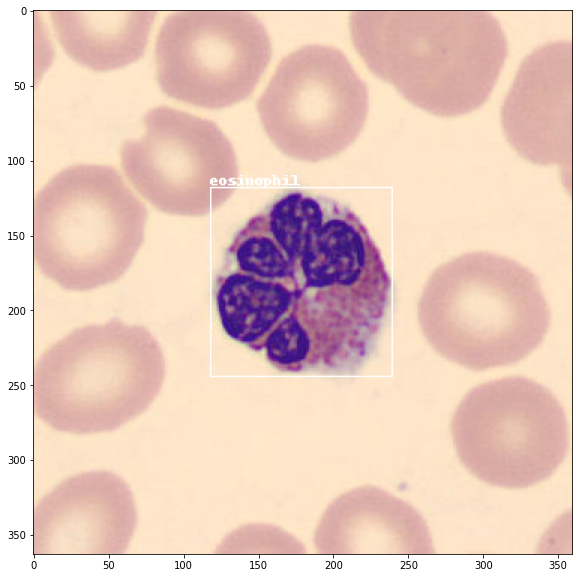

In [148]:
import matplotlib.image as imgmp

random.seed(190)
# Get any random annotation file 
fig = plt.figure(figsize=(10,10))
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
print(image_file,image_file)
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

./labels/lymphocyte/LY_944905.txt
./images/lymphocyte/LY_944905.jpg ./images/lymphocyte/LY_944905.jpg


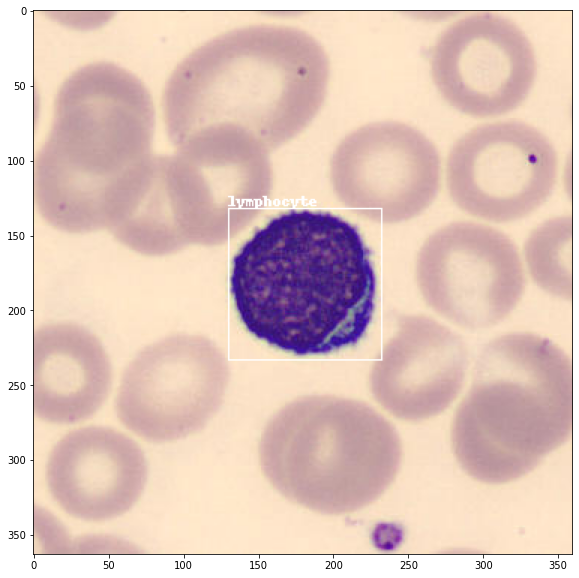

In [149]:
import matplotlib.image as imgmp

random.seed(1000)
fig = plt.figure(figsize=(10,10))
# Get any random annotation file 
annotation_file = random.choice(annotations)
print(annotation_file)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
print(image_file,image_file)
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [156]:
pwd

'/media/ismail/Elements/formation/projet7/bloodcells/blood_dataset'

In [157]:
img = cv.imread('./images/eosinophil/EO_388405.jpg')
img_width = 363
img_height = 500
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# Resize image
dim = (img_width, img_height)
img_result = cv.resize(img, dim, interpolation=cv.INTER_LINEAR)
# Equalization
img_yuv = cv.cvtColor(img_result,cv.COLOR_BGR2YUV)
img_equ = cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB)
dst_img = cv.fastNlMeansDenoisingColored(
    src=img_equ,
    dst=None,
    h=10,
    hColor=10,
    templateWindowSize=7,
    searchWindowSize=21)

cv.imwrite('./testimage/test.jpg', dst_img) 

False

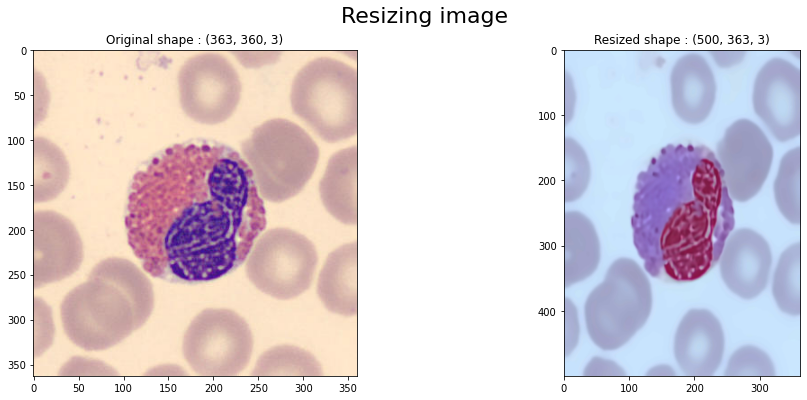

In [158]:

fig = plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original shape : {}".format(img.shape))
plt.subplot(1, 2, 2)
plt.imshow(dst_img)
plt.title("Resized shape : {}".format(dst_img.shape))
plt.suptitle("Resizing image",
             color="black", 
             fontsize=22, y=.98)
plt.show()

./labels/eosinophil/EO_388405.txt
./images/eosinophil/EO_388405.jpg ./images/eosinophil/EO_388405.jpg


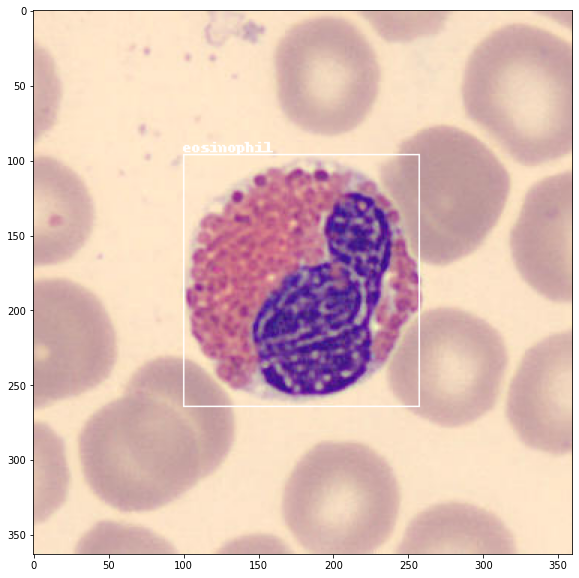

In [160]:
import matplotlib.image as imgmp

random.seed(100)
fig = plt.figure(figsize=(10,10))
# Get any random annotation file 
annotation_file = './labels/eosinophil/EO_388405.txt'
print(annotation_file)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("txt", "jpg").replace('labels','images')
print(image_file,image_file)
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [192]:
pwd

'/media/ismail/Elements/formation/projet7/bloodcells/blood_dataset'

In [127]:
cd /media/ismail/Elements/formation/projet7/bloodcells/blood_dataset

/media/ismail/Elements/formation/projet7/bloodcells/blood_dataset


In [161]:
[os.path.join('images', x) for x in os.listdir('images')]

['images/basophil',
 'images/eosinophil',
 'images/erythroblast',
 'images/lymphocyte',
 'images/monocyte',
 'images/neutrophil']

In [198]:
import os.path
list_miss = []
# directory = os.path.dirname(os.path.realpath(sys.argv[0])) #get the directory of your script
path = './images/'
for subdir, dirs, files in os.walk(path):
    for filename in files:
#         print(filename)
#         subdirectoryPath = os.path.relpath(subdir, 'images') #get the path to your subdirectory
        filePath = os.path.join(subdir, filename) #get the path to your file

        if(filename.find('.jpg') > 0):     
            name = filePath.replace('images','labels').replace('.jpg','.txt')
#             print(name)
            file_exists = os.path.exists(filePath.replace('images','labels').replace('.jpg','.txt'))
            if(file_exists == False):
                list_miss.append(subdir+'/'+filename)
list_miss

[]

In [197]:
for missing_anot in list_miss:
    os.remove(missing_anot)

In [199]:
[os.path.join('labels', x) for x in os.listdir('labels')]

['labels/basophil',
 'labels/eosinophil',
 'labels/erythroblast',
 'labels/lymphocyte',
 'labels/monocyte',
 'labels/neutrophil']

In [200]:
from sklearn.model_selection import train_test_split
# Read images and annotations
images = [os.path.join('images', x) for x in os.listdir('images')]
annotations = [os.path.join('labels', x) for x in os.listdir('labels')]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [202]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder( val_images, 'images/train')
move_files_to_folder(train_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder( val_annotations, 'labels/train/')
move_files_to_folder(train_annotations, 'labels/val/')
move_files_to_folder(test_annotations, 'labels/test/')

In [203]:
cd ..

/media/ismail/Elements/formation/projet7/bloodcells


In [204]:
!rm blood_dataset_yolo.zip

In [205]:
!zip -r blood_dataset_yolo.zip blood_dataset

  adding: blood_dataset/ (stored 0%)
  adding: blood_dataset/images/ (stored 0%)
  adding: blood_dataset/images/test/ (stored 0%)
  adding: blood_dataset/images/test/ERB_372346.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_673516.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_101031.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_101277.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_10157.jpg (deflated 5%)
  adding: blood_dataset/images/test/ERB_101704.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_101733.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_102372.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_102733.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_103778.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_104326.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_104607.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_106275.jpg (deflated 2%)
  adding: blood_dataset/im

  adding: blood_dataset/images/test/ERB_795159.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_795257.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_795425.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_795834.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_796370.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_797029.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_797906.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_801120.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_972534.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_972655.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_972913.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_973241.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_973398.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_973728.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_975272.jpg (deflated 2%)
  adding: blood_dataset/i

  adding: blood_dataset/images/test/ERB_780070.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_780489.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_780692.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_7817.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_782604.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_782888.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_782954.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_783284.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_783378.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_784156.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_784337.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_785122.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_786197.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_786582.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_786710.jpg (deflated 2%)
  adding: blood_dataset/ima

  adding: blood_dataset/images/test/ERB_411240.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_411381.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_413359.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_801863.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_802006.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_803263.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_803291.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_803661.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_804277.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_805341.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_80619.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_806870.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_808591.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_809215.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_810174.jpg (deflated 2%)
  adding: blood_dataset/im

  adding: blood_dataset/images/test/ERB_940294.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_940754.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_940863.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_940933.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_941216.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_941763.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_942308.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_942590.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_942700.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_942720.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_944580.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_944797.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_94501.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_946382.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_901777.jpg (deflated 2%)
  adding: blood_dataset/im

  adding: blood_dataset/images/test/ERB_15740.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_157714.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_157865.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_158786.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_159653.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_160614.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_16164.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_161814.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_515197.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_5158.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_516103.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_516875.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_518664.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_519370.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_519835.jpg (deflated 3%)
  adding: blood_dataset/image

  adding: blood_dataset/images/test/ERB_491843.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_491881.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_492406.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_191913.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_192971.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_193092.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_193374.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_193606.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_193810.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_195694.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_196464.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_19758.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_198977.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_199408.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_199434.jpg (deflated 3%)
  adding: blood_dataset/im

  adding: blood_dataset/images/test/ERB_228522.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_231898.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_23214.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_232331.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_232452.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_232473.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_233.jpg (deflated 6%)
  adding: blood_dataset/images/test/ERB_233793.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_233840.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_234903.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_236261.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_237315.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_237446.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_237692.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_238408.jpg (deflated 1%)
  adding: blood_dataset/image

  adding: blood_dataset/images/test/ERB_871063.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_87123.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_872365.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_872380.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_872425.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_872771.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_748856.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_749143.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_749176.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_749929.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_752263.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_75252.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_753010.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_753427.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_75450.jpg (deflated 2%)
  adding: blood_dataset/imag

  adding: blood_dataset/images/test/ERB_578775.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_579519.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_581016.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_581746.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_581778.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_582434.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_58346.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_584231.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_584583.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_584917.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_585308.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_586845.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_587105.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_587357.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_587463.jpg (deflated 2%)
  adding: blood_dataset/im

  adding: blood_dataset/images/test/ERB_427459.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_427694.jpg (deflated 5%)
  adding: blood_dataset/images/test/ERB_427725.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_427772.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_38351.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_384647.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_384659.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_384697.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_384966.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_385246.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_386111.jpg (deflated 3%)
  adding: blood_dataset/images/test/ERB_386139.jpg (deflated 1%)
  adding: blood_dataset/images/test/ERB_386156.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_386508.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_388154.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/test/ERB_272885.jpg (deflated 2%)
  adding: blood_dataset/images/test/ERB_273428.jpg (deflated 4%)
  adding: blood_dataset/images/test/ERB_274051.jpg (deflated 2%)
  adding: blood_dataset/images/train/ (stored 0%)
  adding: blood_dataset/images/train/EO_100213.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_1007.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_100884.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_10150.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_101772.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_101852.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_103649.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_103746.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_103851.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_103957.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_104169.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_104

  adding: blood_dataset/images/train/EO_413200.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_413926.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_414115.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_414189.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_41456.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_414564.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_414580.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_414685.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_415104.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_415124.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_724995.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_725029.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_725251.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_725577.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_725596.jpg (deflated 2%)
  adding: blood_dataset/im

  adding: blood_dataset/images/train/EO_394672.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_580802.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_580840.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_581311.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_581439.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_581610.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_581765.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_581948.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_582429.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_582679.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_582920.jpg (deflated 3%)
  adding: blood_dataset/images/train/EO_582940.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_582948.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_583076.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_583142.jpg (deflated 2%)
  adding: blood_dataset/i

  adding: blood_dataset/images/train/EO_179046.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_180121.jpg (deflated 3%)
  adding: blood_dataset/images/train/EO_180811.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_182160.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_182479.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_18363.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_18395.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_185146.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_185749.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_185985.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_186769.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_18685.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_187031.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_187981.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_188199.jpg (deflated 1%)
  adding: blood_dataset/imag

  adding: blood_dataset/images/train/EO_291250.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_291508.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_291685.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_291883.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_292022.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_292560.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_458873.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_459049.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_459590.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_460233.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_460463.jpg (deflated 3%)
  adding: blood_dataset/images/train/EO_460476.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_460941.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_461608.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_461953.jpg (deflated 1%)
  adding: blood_dataset/i

  adding: blood_dataset/images/train/EO_756779.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_757168.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_757296.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_757859.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_757993.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_759358.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_759458.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_759484.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_75989.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_760122.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_760298.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_76093.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_761108.jpg (deflated 3%)
  adding: blood_dataset/images/train/EO_76111.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_761180.jpg (deflated 1%)
  adding: blood_dataset/imag

  adding: blood_dataset/images/train/EO_294492.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_294566.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_294946.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_295602.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_295726.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_296431.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_29702.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_297333.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_297372.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_29763.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_298214.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_298423.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_29868.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_123327.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_123499.jpg (deflated 1%)
  adding: blood_dataset/imag

  adding: blood_dataset/images/train/EO_469045.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_469322.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_469614.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_469714.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_470500.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_470840.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_470880.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_769328.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_769464.jpg (deflated 3%)
  adding: blood_dataset/images/train/EO_769518.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_769690.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_7698.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_77098.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_771144.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_77152.jpg (deflated 2%)
  adding: blood_dataset/image

  adding: blood_dataset/images/train/EO_322766.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_326816.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_333590.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_344782.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_350212.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_356298.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_363808.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_370072.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_374119.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_378650.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_389300.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_39469.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_402264.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_408710.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_948168.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/train/EO_802739.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_809901.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_813789.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_818876.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_828208.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_835127.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_842254.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_848321.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_851904.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_857139.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_861772.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_865945.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_873315.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_882085.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_89011.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/train/EO_485946.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_27809.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_278121.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_278219.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_278343.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_278427.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_278488.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_278646.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_278795.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_278802.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_279650.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_279817.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_280451.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_280653.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_28080.jpg (deflated 1%)
  adding: blood_dataset/ima

  adding: blood_dataset/images/train/EO_928297.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_928662.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_928682.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_928972.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_929125.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_929265.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_929591.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_929592.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_929886.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_930114.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_930939.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_933767.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_933922.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_934148.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_93417.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/train/EO_824579.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_824657.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_824787.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_825319.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_825350.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_825368.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_825733.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_825740.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_825851.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_826258.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_8265.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_826646.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_826999.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_828135.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_494662.jpg (deflated 1%)
  adding: blood_dataset/ima

  adding: blood_dataset/images/train/EO_161656.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_161989.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_162015.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_162059.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_162162.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_648175.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_648206.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_648225.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_648641.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_6489.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_648933.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_648962.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_649430.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_649696.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_649723.jpg (deflated 1%)
  adding: blood_dataset/ima

  adding: blood_dataset/images/train/EO_234694.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_235307.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_23571.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_235932.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_236154.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_236288.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_236407.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_236852.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_236965.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_237035.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_23704.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_237312.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_237789.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_195559.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_195564.jpg (deflated 2%)
  adding: blood_dataset/ima

  adding: blood_dataset/images/train/EO_515602.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_51563.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_515942.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_140611.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_141054.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_141524.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_141807.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_142429.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_142659.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_142899.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_143764.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_144566.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_14468.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_145815.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_146319.jpg (deflated 1%)
  adding: blood_dataset/ima

  adding: blood_dataset/images/train/EO_522232.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_522315.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_522755.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_523268.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_523473.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_523868.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_524469.jpg (deflated 3%)
  adding: blood_dataset/images/train/EO_524648.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_524854.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_525056.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_525311.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_52578.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_526125.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_526407.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_526408.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/train/EO_652542.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_652701.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_65339.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_655132.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_655234.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_655398.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_65638.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_656959.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_657178.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_657449.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_657836.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_657993.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_658500.jpg (deflated 2%)
  adding: blood_dataset/images/train/EO_658954.jpg (deflated 1%)
  adding: blood_dataset/images/train/EO_720242.jpg (deflated 2%)
  adding: blood_dataset/ima

  adding: blood_dataset/images/val/basophil/BA_107595.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_107876.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_111710.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_112418.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_114542.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_114899.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_115323.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_115777.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_116477.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_119131.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_119883.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_120278.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_120688.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_121453.jpg (defla

  adding: blood_dataset/images/val/basophil/BA_330244.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_330726.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_331375.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_332289.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_332496.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_332707.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_333456.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_334078.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_335261.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_335749.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_337027.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_338090.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_338546.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_338791.jpg (defla

  adding: blood_dataset/images/val/basophil/BA_324268.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_324706.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_32490.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_324965.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_326538.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_326722.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_32675.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_243213.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_243554.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_243889.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_245418.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_24720.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_248930.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_24963.jpg (deflated 

  adding: blood_dataset/images/val/basophil/BA_145728.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_147402.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_147981.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_151210.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_152650.jpg (deflated 3%)
  adding: blood_dataset/images/val/basophil/BA_152708.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_174705.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_174731.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_175269.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_175579.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_176200.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_17648.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_177230.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_177799.jpg (deflat

  adding: blood_dataset/images/val/basophil/BA_65751.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_658251.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_658350.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_659008.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_339232.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_340913.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_343929.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_34424.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_344479.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_345077.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_345373.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_346352.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_347386.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_347981.jpg (deflate

  adding: blood_dataset/images/val/basophil/BA_746935.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_747919.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_748012.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_74809.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_74901.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_749108.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_749588.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_74973.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_752647.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_752724.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_752996.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_753251.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_75331.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_754100.jpg (deflated 

  adding: blood_dataset/images/val/basophil/BA_691060.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_691117.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_691235.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_691762.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_692284.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_692349.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_692723.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_693714.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_695025.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_695174.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_695712.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_696680.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_698070.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_698312.jpg (defla

  adding: blood_dataset/images/val/basophil/BA_710454.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_710902.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_711276.jpg (deflated 3%)
  adding: blood_dataset/images/val/basophil/BA_712840.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_712958.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_713194.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_716054.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_716177.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_717119.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_717328.jpg (deflated 1%)
  adding: blood_dataset/images/val/basophil/BA_720056.jpg (deflated 3%)
  adding: blood_dataset/images/val/basophil/BA_547170.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_549440.jpg (deflated 2%)
  adding: blood_dataset/images/val/basophil/BA_549762.jpg (defla

  adding: blood_dataset/images/val/lymphocyte/LY_644865.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_64544.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_646314.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_646631.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_646786.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_646894.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_646905.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_646952.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_647109.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_647287.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_647577.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_649255.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_649814.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymp

  adding: blood_dataset/images/val/lymphocyte/LY_488198.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_488343.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_48852.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_489582.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_179230.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_179236.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_179366.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_179585.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_18213.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_182632.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_183839.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_184784.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_185090.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymph

  adding: blood_dataset/images/val/lymphocyte/LY_603476.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_603507.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_604428.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_604558.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_606151.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_607133.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_607326.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_607451.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_609104.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_609401.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_609443.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_612132.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_612323.jpg (deflated 1%)
  adding: blood_dataset/images/val/lym

  adding: blood_dataset/images/val/lymphocyte/LY_815802.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_815826.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_815909.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_816147.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_81744.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_817702.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_818085.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_818290.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_818656.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_818779.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_819068.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_199996.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_200436.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymp

  adding: blood_dataset/images/val/lymphocyte/LY_64434.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_16157.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_163635.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_164687.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_164944.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_165111.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_166114.jpg (deflated 4%)
  adding: blood_dataset/images/val/lymphocyte/LY_166694.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_166721.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_167158.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_16740.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_168926.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_169448.jpg (deflated 2%)
  adding: blood_dataset/images/val/lympho

  adding: blood_dataset/images/val/lymphocyte/LY_324792.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_324819.jpg (deflated 5%)
  adding: blood_dataset/images/val/lymphocyte/LY_32523.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_325503.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_872934.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_873168.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_873630.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_874360.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_874739.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_874823.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_875286.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_875452.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_875657.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymp

  adding: blood_dataset/images/val/lymphocyte/LY_579967.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_580251.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_581436.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_581500.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_583675.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_301320.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_301915.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_303897.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_304716.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_305059.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_305468.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_305556.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_308489.jpg (deflated 3%)
  adding: blood_dataset/images/val/lym

  adding: blood_dataset/images/val/lymphocyte/LY_724965.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_725386.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_725575.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_726808.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_727511.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_727634.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_728263.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_729776.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_730192.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_730423.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_730801.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_731097.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_731457.jpg (deflated 1%)
  adding: blood_dataset/images/val/lym

  adding: blood_dataset/images/val/lymphocyte/LY_33119.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_331610.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_333022.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_333883.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_334677.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_335261.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_752008.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_752478.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_752671.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_752828.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_753705.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_753964.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_754771.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymp

  adding: blood_dataset/images/val/lymphocyte/LY_554041.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_554364.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_554492.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_554741.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_554979.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_555347.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_556886.jpg (deflated 3%)
  adding: blood_dataset/images/val/lymphocyte/LY_557882.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_558615.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_559940.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_560142.jpg (deflated 1%)
  adding: blood_dataset/images/val/lymphocyte/LY_562157.jpg (deflated 2%)
  adding: blood_dataset/images/val/lymphocyte/LY_562164.jpg (deflated 1%)
  adding: blood_dataset/images/val/lym

  adding: blood_dataset/images/val/MO_648815.jpg (deflated 3%)
  adding: blood_dataset/images/val/MO_649150.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_649556.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_649902.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_649989.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_650709.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_65093.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_652110.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_652800.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_707045.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_707140.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_707494.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_707836.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_70803.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_70970.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_709754.jpg (deflated

  adding: blood_dataset/images/val/MO_168549.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_168818.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_168917.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_168925.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_169657.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_170993.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_171455.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_172354.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_172654.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_173558.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_174318.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_174547.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_176021.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_177234.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_179303.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_179950.jpg (defla

  adding: blood_dataset/images/val/MO_192510.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_192551.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_19376.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_194123.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_194219.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_194646.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_273522.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_27445.jpg (deflated 3%)
  adding: blood_dataset/images/val/MO_275440.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_275459.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_276444.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_277784.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_278768.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_28078.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_283747.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_283783.jpg (deflated

  adding: blood_dataset/images/val/MO_673929.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_674127.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_546259.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_546759.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_546774.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_547080.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_547178.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_547845.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_548509.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_548871.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_551018.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_551084.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_551683.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_551759.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_552161.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_552414.jpg (defla

  adding: blood_dataset/images/val/MO_452441.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_898317.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_898744.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_898913.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_898984.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_899210.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_899539.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_89959.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_900927.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_901312.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_902264.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_902638.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_902874.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_903537.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_903587.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_903914.jpg (deflat

  adding: blood_dataset/images/val/MO_344440.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_345398.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_345587.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_345969.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_347962.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_348475.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_348717.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_348749.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_568713.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_569269.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_571631.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_571951.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_573001.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_573622.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_574035.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_574699.jpg (defla

  adding: blood_dataset/images/val/MO_944566.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_945019.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_945220.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_945498.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_94561.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_946704.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_946848.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_947642.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_94823.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_948549.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_949892.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_950456.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_952246.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_952489.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_952558.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_952579.jpg (deflate

  adding: blood_dataset/images/val/MO_387936.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_38915.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_389357.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_389525.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_389641.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_390934.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_391733.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_392030.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_392040.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_392815.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_394173.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_394238.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_394926.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_396043.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_397136.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_398318.jpg (deflat

  adding: blood_dataset/images/val/MO_125963.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_127949.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_128174.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_128218.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_129006.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_12960.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_131262.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_132182.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_133271.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_133442.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_133444.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_134551.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_804611.jpg (deflated 2%)
  adding: blood_dataset/images/val/MO_805320.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_805911.jpg (deflated 1%)
  adding: blood_dataset/images/val/MO_806423.jpg (deflat

  adding: blood_dataset/images/val/neutrophil/BNE_121986.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_129177.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_145948.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_159609.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_170066.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_179915.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_195004.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_214018.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_225821.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_239636.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_247568.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_25765.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_269921.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/SNE_725375.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_725873.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_726181.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_726828.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_727213.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_727461.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_730423.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_731589.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_73239.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_732623.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_73281.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_732862.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_734146.jpg (deflated 1%)
  adding: blood_dataset/ima

  adding: blood_dataset/images/val/neutrophil/NEUTROPHIL_409124.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/NEUTROPHIL_427225.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/NEUTROPHIL_435447.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/NEUTROPHIL_438135.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/NEUTROPHIL_471493.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/NEUTROPHIL_473612.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_879421.jpg (deflated 4%)
  adding: blood_dataset/images/val/neutrophil/BNE_881009.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_882003.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_882512.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_883125.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_883723.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_884373.j

  adding: blood_dataset/images/val/neutrophil/SNE_13843.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_138431.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_139017.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_139869.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_13989.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_14041.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_140435.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_140717.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_140904.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_764437.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_765092.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_765760.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_76582.jpg (deflated 1%)
  adding: blood_dataset/image

  adding: blood_dataset/images/val/neutrophil/SNE_636414.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_63643.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_392617.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_393713.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_394048.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_394122.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_394622.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_394861.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_395210.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_395253.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_395866.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_396735.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_397471.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/BNE_477145.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_477641.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_480263.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_480371.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_480776.jpg (deflated 3%)
  adding: blood_dataset/images/val/neutrophil/BNE_480971.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_481801.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_481879.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_482975.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_48402.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_484057.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_485377.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_487299.jpg (deflated 2%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/SNE_489607.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_499346.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_506153.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_514355.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_526872.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_541286.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_554543.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_206630.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_207129.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_207145.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_207714.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_207762.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_208866.jpg (deflated 2%)
  adding: blood_dataset/i

  adding: blood_dataset/images/val/neutrophil/SNE_642932.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_643406.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_645203.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_645614.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_645724.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_646450.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_646674.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_646915.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_647035.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_64736.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_648057.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_64808.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_648700.jpg (deflated 1%)
  adding: blood_dataset/ima

  adding: blood_dataset/images/val/neutrophil/BNE_540699.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_540909.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_542957.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_543730.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_544250.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_54463.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_544854.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_545123.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_545407.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_546147.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_698403.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_698717.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_699064.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/BNE_334257.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_335505.jpg (deflated 4%)
  adding: blood_dataset/images/val/neutrophil/SNE_81065.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_810665.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_810873.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_811155.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_811554.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_81248.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_813844.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_813985.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_814256.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_814713.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_8150.jpg (deflated 1%)
  adding: blood_dataset/image

  adding: blood_dataset/images/val/neutrophil/SNE_333737.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_334919.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_334920.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_336220.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_33661.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_337880.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_338117.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_338242.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_339035.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_339538.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_339572.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_339610.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_340205.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/BNE_594365.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_595137.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_595203.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_596214.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_596261.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_596329.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_596393.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_59680.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_59746.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_59753.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_598005.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_598093.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_598157.jpg (deflated 1%)
  adding: blood_dataset/imag

  adding: blood_dataset/images/val/neutrophil/BNE_34307.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_343542.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_343646.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_343960.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_344695.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_344758.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_344852.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_345170.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_345442.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_345668.jpg (deflated 3%)
  adding: blood_dataset/images/val/neutrophil/BNE_345873.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_346149.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_347146.jpg (deflated 2%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/SNE_679413.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_679559.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_679601.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_682015.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_682213.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_68308.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_683106.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_684234.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_68465.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_684882.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_685496.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_686557.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_687178.jpg (deflated 1%)
  adding: blood_dataset/ima

  adding: blood_dataset/images/val/neutrophil/BNE_2810.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_281395.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_282906.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_610438.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_6105.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_61066.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_610750.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_611822.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_612365.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_612880.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_613380.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_613420.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_613572.jpg (deflated 2%)
  adding: blood_dataset/images

  adding: blood_dataset/images/val/neutrophil/SNE_223132.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_223437.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_224062.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_224317.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_226032.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_599043.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_599061.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_600196.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_600309.jpg (deflated 3%)
  adding: blood_dataset/images/val/neutrophil/BNE_60203.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_602066.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_602109.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_602491.jpg (deflated 2%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/BNE_158778.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_159250.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_928561.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_928577.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_929802.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_929997.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_930364.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_930707.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_933305.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_934554.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_935665.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_935780.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_936163.jpg (deflated 2%)
  adding: blood_dataset/i

  adding: blood_dataset/images/val/neutrophil/BNE_735513.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_736774.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_73716.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_739399.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_739805.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_740551.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_741019.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_741104.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_74120.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_309792.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_30987.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_310148.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_310407.jpg (deflated 1%)
  adding: blood_dataset/imag

  adding: blood_dataset/images/val/neutrophil/BNE_806131.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_806828.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_808074.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_808076.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_808310.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_808363.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_808960.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_809009.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_810533.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_81058.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_810657.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_499158.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_499517.jpg (deflated 3%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/SNE_125468.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_125477.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_125792.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_126017.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_126817.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_126871.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_12708.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_128810.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_129727.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_130010.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_130136.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_130192.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_130422.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/BNE_276002.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_276258.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_276467.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_276644.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_277078.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_742479.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_742515.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_746471.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_746634.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_747210.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_747852.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_748204.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_748706.jpg (deflated 1%)
  adding: blood_dataset/i

  adding: blood_dataset/images/val/neutrophil/BNE_953017.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_954079.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_954379.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_954919.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_955098.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_955134.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_95555.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_955797.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_955849.jpg (deflated 3%)
  adding: blood_dataset/images/val/neutrophil/BNE_956356.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_956550.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_956597.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_957531.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/BNE_927001.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_811195.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_823036.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_835325.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_846496.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_860699.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_878990.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_891971.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_903935.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_91645.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_928146.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_938012.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_951815.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/BNE_442322.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_44328.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_443350.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_443921.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_444300.jpg (deflated 4%)
  adding: blood_dataset/images/val/neutrophil/BNE_445224.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_446320.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_446959.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_447437.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_447939.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_448104.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_44826.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_448273.jpg (deflated 2%)
  adding: blood_dataset/ima

  adding: blood_dataset/images/val/neutrophil/BNE_427592.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_42789.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_428219.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_430604.jpg (deflated 3%)
  adding: blood_dataset/images/val/neutrophil/BNE_431488.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_432647.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_433423.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_434568.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_435236.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_436110.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_436213.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_436393.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_436569.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/BNE_846661.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_847110.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_847477.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_848315.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_848343.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_848534.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_850427.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/BNE_850956.jpg (deflated 3%)
  adding: blood_dataset/images/val/neutrophil/BNE_852425.jpg (deflated 3%)
  adding: blood_dataset/images/val/neutrophil/BNE_853528.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_853952.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_854066.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/BNE_854167.jpg (deflated 1%)
  adding: blood_dataset/i

  adding: blood_dataset/images/val/neutrophil/SNE_851268.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_851309.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_851924.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_911200.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_911441.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_911483.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_912151.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_912333.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_912820.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_912821.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_914583.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_914937.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_91516.jpg (deflated 2%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/SNE_112815.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_112837.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_113678.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_113869.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_114388.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_114771.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_115658.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_115938.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_116255.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_117234.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_117404.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_118348.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_118471.jpg (deflated 2%)
  adding: blood_dataset/i

  adding: blood_dataset/images/val/neutrophil/SNE_86341.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_873201.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_881109.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_887894.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_894321.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_902951.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_910943.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_927585.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_941605.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_952640.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_962008.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_970608.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_979904.jpg (deflated 1%)
  adding: blood_dataset/im

  adding: blood_dataset/images/val/neutrophil/SNE_548602.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_550192.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_550919.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_551569.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_551599.jpg (deflated 2%)
  adding: blood_dataset/images/val/neutrophil/SNE_553078.jpg (deflated 1%)
  adding: blood_dataset/images/val/neutrophil/SNE_55404.jpg (deflated 1%)
  adding: blood_dataset/labels/ (stored 0%)
  adding: blood_dataset/labels/test/ (stored 0%)
  adding: blood_dataset/labels/test/ERB_101031.txt (deflated 21%)
  adding: blood_dataset/labels/test/ERB_101277.txt (deflated 24%)
  adding: blood_dataset/labels/test/ERB_10157.txt (deflated 16%)
  adding: blood_dataset/labels/test/ERB_101704.txt (deflated 27%)
  adding: blood_dataset/labels/test/ERB_101733.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_102372.txt (de

  adding: blood_dataset/labels/test/ERB_192971.txt (deflated 8%)
  adding: blood_dataset/labels/test/ERB_193092.txt (deflated 37%)
  adding: blood_dataset/labels/test/ERB_193606.txt (deflated 23%)
  adding: blood_dataset/labels/test/ERB_193810.txt (deflated 41%)
  adding: blood_dataset/labels/test/ERB_195694.txt (deflated 16%)
  adding: blood_dataset/labels/test/ERB_196464.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_19758.txt (deflated 12%)
  adding: blood_dataset/labels/test/ERB_198977.txt (deflated 28%)
  adding: blood_dataset/labels/test/ERB_199408.txt (deflated 18%)
  adding: blood_dataset/labels/test/ERB_199434.txt (deflated 24%)
  adding: blood_dataset/labels/test/ERB_199640.txt (deflated 38%)
  adding: blood_dataset/labels/test/ERB_200117.txt (deflated 19%)
  adding: blood_dataset/labels/test/ERB_20036.txt (deflated 8%)
  adding: blood_dataset/labels/test/ERB_20087.txt (deflated 41%)
  adding: blood_dataset/labels/test/ERB_202057.txt (deflated 24%)
  adding: blood

  adding: blood_dataset/labels/test/ERB_272429.txt (deflated 29%)
  adding: blood_dataset/labels/test/ERB_272885.txt (deflated 28%)
  adding: blood_dataset/labels/test/ERB_273428.txt (deflated 18%)
  adding: blood_dataset/labels/test/ERB_274051.txt (deflated 12%)
  adding: blood_dataset/labels/test/ERB_27464.txt (deflated 25%)
  adding: blood_dataset/labels/test/ERB_275509.txt (deflated 32%)
  adding: blood_dataset/labels/test/ERB_275992.txt (deflated 8%)
  adding: blood_dataset/labels/test/ERB_276729.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_276730.txt (deflated 30%)
  adding: blood_dataset/labels/test/ERB_277785.txt (deflated 17%)
  adding: blood_dataset/labels/test/ERB_278790.txt (deflated 18%)
  adding: blood_dataset/labels/test/ERB_279050.txt (deflated 27%)
  adding: blood_dataset/labels/test/ERB_279810.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_280069.txt (deflated 24%)
  adding: blood_dataset/labels/test/ERB_281125.txt (deflated 16%)
  adding: bl

  adding: blood_dataset/labels/test/ERB_396562.txt (deflated 29%)
  adding: blood_dataset/labels/test/ERB_397552.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_398533.txt (deflated 8%)
  adding: blood_dataset/labels/test/ERB_398984.txt (deflated 16%)
  adding: blood_dataset/labels/test/ERB_401367.txt (deflated 22%)
  adding: blood_dataset/labels/test/ERB_401650.txt (deflated 21%)
  adding: blood_dataset/labels/test/ERB_402367.txt (deflated 26%)
  adding: blood_dataset/labels/test/ERB_402842.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_404854.txt (deflated 16%)
  adding: blood_dataset/labels/test/ERB_405525.txt (deflated 33%)
  adding: blood_dataset/labels/test/ERB_405756.txt (deflated 30%)
  adding: blood_dataset/labels/test/ERB_405806.txt (deflated 21%)
  adding: blood_dataset/labels/test/ERB_406182.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_406256.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_40659.txt (deflated 11%)
  adding: bl

  adding: blood_dataset/labels/test/ERB_51023.txt (deflated 18%)
  adding: blood_dataset/labels/test/ERB_510232.txt (deflated 29%)
  adding: blood_dataset/labels/test/ERB_510644.txt (deflated 27%)
  adding: blood_dataset/labels/test/ERB_511048.txt (deflated 8%)
  adding: blood_dataset/labels/test/ERB_512946.txt (deflated 16%)
  adding: blood_dataset/labels/test/ERB_513727.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_513969.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_515197.txt (deflated 16%)
  adding: blood_dataset/labels/test/ERB_5158.txt (deflated 29%)
  adding: blood_dataset/labels/test/ERB_516103.txt (deflated 12%)
  adding: blood_dataset/labels/test/ERB_518664.txt (deflated 8%)
  adding: blood_dataset/labels/test/ERB_519370.txt (deflated 18%)
  adding: blood_dataset/labels/test/ERB_519835.txt (deflated 14%)
  adding: blood_dataset/labels/test/ERB_519914.txt (deflated 8%)
  adding: blood_dataset/labels/test/ERB_52025.txt (deflated 13%)
  adding: blood_d

  adding: blood_dataset/labels/test/ERB_645898.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_646038.txt (deflated 16%)
  adding: blood_dataset/labels/test/ERB_648342.txt (deflated 8%)
  adding: blood_dataset/labels/test/ERB_649060.txt (deflated 28%)
  adding: blood_dataset/labels/test/ERB_649404.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_649651.txt (deflated 22%)
  adding: blood_dataset/labels/test/ERB_649896.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_65022.txt (deflated 22%)
  adding: blood_dataset/labels/test/ERB_650236.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_650404.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_651455.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_651906.txt (deflated 24%)
  adding: blood_dataset/labels/test/ERB_651933.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_652720.txt (deflated 5%)
  adding: blood_dataset/labels/test/ERB_653606.txt (deflated 11%)
  adding: blo

  adding: blood_dataset/labels/test/ERB_721235.txt (deflated 12%)
  adding: blood_dataset/labels/test/ERB_721782.txt (deflated 27%)
  adding: blood_dataset/labels/test/ERB_721826.txt (deflated 26%)
  adding: blood_dataset/labels/test/ERB_723032.txt (deflated 27%)
  adding: blood_dataset/labels/test/ERB_723913.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_72526.txt (deflated 18%)
  adding: blood_dataset/labels/test/ERB_725383.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_726710.txt (deflated 21%)
  adding: blood_dataset/labels/test/ERB_727217.txt (deflated 18%)
  adding: blood_dataset/labels/test/ERB_727362.txt (deflated 16%)
  adding: blood_dataset/labels/test/ERB_727394.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_727437.txt (deflated 19%)
  adding: blood_dataset/labels/test/ERB_728091.txt (deflated 27%)
  adding: blood_dataset/labels/test/ERB_728314.txt (deflated 21%)
  adding: blood_dataset/labels/test/ERB_729615.txt (deflated 37%)
  adding: b

  adding: blood_dataset/labels/test/ERB_848305.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_848553.txt (deflated 12%)
  adding: blood_dataset/labels/test/ERB_84909.txt (deflated 26%)
  adding: blood_dataset/labels/test/ERB_84926.txt (deflated 18%)
  adding: blood_dataset/labels/test/ERB_849685.txt (deflated 28%)
  adding: blood_dataset/labels/test/ERB_85008.txt (deflated 29%)
  adding: blood_dataset/labels/test/ERB_850278.txt (deflated 12%)
  adding: blood_dataset/labels/test/ERB_851280.txt (deflated 16%)
  adding: blood_dataset/labels/test/ERB_852129.txt (deflated 16%)
  adding: blood_dataset/labels/test/ERB_852490.txt (deflated 28%)
  adding: blood_dataset/labels/test/ERB_853761.txt (deflated 8%)
  adding: blood_dataset/labels/test/ERB_854507.txt (deflated 24%)
  adding: blood_dataset/labels/test/ERB_8550.txt (deflated 16%)
  adding: blood_dataset/labels/test/ERB_855095.txt (deflated 21%)
  adding: blood_dataset/labels/test/ERB_855646.txt (deflated 28%)
  adding: blood_

  adding: blood_dataset/labels/test/ERB_972534.txt (deflated 16%)
  adding: blood_dataset/labels/test/ERB_972655.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_972913.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_973241.txt (deflated 29%)
  adding: blood_dataset/labels/test/ERB_973398.txt (deflated 39%)
  adding: blood_dataset/labels/test/ERB_973728.txt (deflated 18%)
  adding: blood_dataset/labels/test/ERB_975272.txt (deflated 29%)
  adding: blood_dataset/labels/test/ERB_975552.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_976006.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_976591.txt (deflated 21%)
  adding: blood_dataset/labels/test/ERB_976670.txt (deflated 13%)
  adding: blood_dataset/labels/test/ERB_976736.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_977142.txt (deflated 11%)
  adding: blood_dataset/labels/test/ERB_977194.txt (deflated 22%)
  adding: blood_dataset/labels/test/ERB_97746.txt (deflated 29%)
  adding: b

  adding: blood_dataset/labels/train/EO_147464.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_147562.txt (deflated 23%)
  adding: blood_dataset/labels/train/EO_147843.txt (deflated 37%)
  adding: blood_dataset/labels/train/EO_147951.txt (deflated 27%)
  adding: blood_dataset/labels/train/EO_149695.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_149787.txt (deflated 15%)
  adding: blood_dataset/labels/train/EO_150121.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_150174.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_150200.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_150361.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_15074093.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_150810.txt (deflated 15%)
  adding: blood_dataset/labels/train/EO_150966.txt (deflated 28%)
  adding: blood_dataset/labels/train/EO_151442.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_151527.txt (deflated 16%)
  adding

  adding: blood_dataset/labels/train/EO_215761.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_215945.txt (deflated 8%)
  adding: blood_dataset/labels/train/EO_216577.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_216862.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_217069.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_217076.txt (deflated 29%)
  adding: blood_dataset/labels/train/EO_217802.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_218066.txt (deflated 27%)
  adding: blood_dataset/labels/train/EO_218071.txt (deflated 17%)
  adding: blood_dataset/labels/train/EO_218478.txt (deflated 15%)
  adding: blood_dataset/labels/train/EO_218533.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_218637.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_219068.txt (deflated 38%)
  adding: blood_dataset/labels/train/EO_21910.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_219842.txt (deflated 21%)
  adding: bl

  adding: blood_dataset/labels/train/EO_271708.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_272663.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_273049.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_2736.txt (deflated 8%)
  adding: blood_dataset/labels/train/EO_27382.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_273880.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_274103.txt (deflated 19%)
  adding: blood_dataset/labels/train/EO_27437.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_274435.txt (deflated 30%)
  adding: blood_dataset/labels/train/EO_274458.txt (deflated 12%)
  adding: blood_dataset/labels/train/EO_274574.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_274822.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_27502.txt (deflated 8%)
  adding: blood_dataset/labels/train/EO_275142.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_275189.txt (deflated 24%)
  adding: blood_d

  adding: blood_dataset/labels/train/EO_329010.txt (deflated 14%)
  adding: blood_dataset/labels/train/EO_329444.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_329897.txt (deflated 27%)
  adding: blood_dataset/labels/train/EO_329975.txt (deflated 19%)
  adding: blood_dataset/labels/train/EO_330411.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_330708.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_330760.txt (deflated 31%)
  adding: blood_dataset/labels/train/EO_330791.txt (deflated 29%)
  adding: blood_dataset/labels/train/EO_331211.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_331664.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_331701.txt (deflated 17%)
  adding: blood_dataset/labels/train/EO_331982.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_332005.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_332343.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_333101.txt (deflated 8%)
  adding: b

  adding: blood_dataset/labels/train/EO_448399.txt (deflated 12%)
  adding: blood_dataset/labels/train/EO_448998.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_449091.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_449240.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_449362.txt (deflated 14%)
  adding: blood_dataset/labels/train/EO_449710.txt (deflated 14%)
  adding: blood_dataset/labels/train/EO_449753.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_450536.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_451304.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_451491.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_451494.txt (deflated 14%)
  adding: blood_dataset/labels/train/EO_452374.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_452455.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_452888.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_45291.txt (deflated 18%)
  adding: b

  adding: blood_dataset/labels/train/EO_388588.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_389123.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_389227.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_389244.txt (deflated 27%)
  adding: blood_dataset/labels/train/EO_389300.txt (deflated 26%)
  adding: blood_dataset/labels/train/EO_389584.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_390237.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_390334.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_390478.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_390531.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_390633.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_390994.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_391732.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_392003.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_39294.txt (deflated 16%)
  adding: b

  adding: blood_dataset/labels/train/EO_462115.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_462597.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_462783.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_462794.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_463377.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_46356.txt (deflated 14%)
  adding: blood_dataset/labels/train/EO_463820.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_464002.txt (deflated 19%)
  adding: blood_dataset/labels/train/EO_464030.txt (deflated 17%)
  adding: blood_dataset/labels/train/EO_464387.txt (deflated 17%)
  adding: blood_dataset/labels/train/EO_464699.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_464735.txt (deflated 26%)
  adding: blood_dataset/labels/train/EO_465089.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_466494.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_466882.txt (deflated 30%)
  adding: b

  adding: blood_dataset/labels/train/EO_488535.txt (deflated 23%)
  adding: blood_dataset/labels/train/EO_491368.txt (deflated 22%)
  adding: blood_dataset/labels/train/EO_495066.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_500122.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_506171.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_51138.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_516640.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_521292.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_526624.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_531157.txt (deflated 10%)
  adding: blood_dataset/labels/train/EO_536245.txt (deflated 29%)
  adding: blood_dataset/labels/train/EO_541020.txt (deflated 29%)
  adding: blood_dataset/labels/train/EO_54685.txt (deflated 8%)
  adding: blood_dataset/labels/train/EO_522232.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_522315.txt (deflated 21%)
  adding: blo

  adding: blood_dataset/labels/train/EO_592257.txt (deflated 9%)
  adding: blood_dataset/labels/train/EO_592357.txt (deflated 8%)
  adding: blood_dataset/labels/train/EO_592605.txt (deflated 19%)
  adding: blood_dataset/labels/train/EO_593837.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_594333.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_594721.txt (deflated 32%)
  adding: blood_dataset/labels/train/EO_594816.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_595397.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_596214.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_596923.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_597199.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_597403.txt (deflated 15%)
  adding: blood_dataset/labels/train/EO_598317.txt (deflated 8%)
  adding: blood_dataset/labels/train/EO_599188.txt (deflated 8%)
  adding: blood_dataset/labels/train/EO_599236.txt (deflated 22%)
  adding: bloo

  adding: blood_dataset/labels/train/EO_650226.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_650903.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_651122.txt (deflated 19%)
  adding: blood_dataset/labels/train/EO_651241.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_651676.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_651856.txt (deflated 26%)
  adding: blood_dataset/labels/train/EO_652099.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_652278.txt (deflated 19%)
  adding: blood_dataset/labels/train/EO_652285.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_652411.txt (deflated 19%)
  adding: blood_dataset/labels/train/EO_652542.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_652701.txt (deflated 22%)
  adding: blood_dataset/labels/train/EO_65339.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_655132.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_655234.txt (deflated 29%)
  adding: b

  adding: blood_dataset/labels/train/EO_682455.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_683491.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_684536.txt (deflated 28%)
  adding: blood_dataset/labels/train/EO_684768.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_684866.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_68522.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_685543.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_685573.txt (deflated 27%)
  adding: blood_dataset/labels/train/EO_685713.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_685778.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_685815.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_685822.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_686204.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_686463.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_687306.txt (deflated 11%)
  adding: b

  adding: blood_dataset/labels/train/EO_745249.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_745272.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_745911.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_746433.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_747341.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_74742.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_747479.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_74751.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_747861.txt (deflated 27%)
  adding: blood_dataset/labels/train/EO_747892.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_748175.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_74854.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_748589.txt (deflated 29%)
  adding: blood_dataset/labels/train/EO_749176.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_74921.txt (deflated 12%)
  adding: bloo

  adding: blood_dataset/labels/train/EO_835312.txt (deflated 22%)
  adding: blood_dataset/labels/train/EO_835323.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_835338.txt (deflated 19%)
  adding: blood_dataset/labels/train/EO_83547.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_836459.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_837323.txt (deflated 45%)
  adding: blood_dataset/labels/train/EO_838548.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_838971.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_839677.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_83980.txt (deflated 9%)
  adding: blood_dataset/labels/train/EO_839813.txt (deflated 19%)
  adding: blood_dataset/labels/train/EO_840542.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_841078.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_841216.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_841745.txt (deflated 24%)
  adding: blo

  adding: blood_dataset/labels/train/EO_906513.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_906650.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_907316.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_907904.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_908152.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_908387.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_908396.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_908442.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_908706.txt (deflated 11%)
  adding: blood_dataset/labels/train/EO_908932.txt (deflated 19%)
  adding: blood_dataset/labels/train/EO_909229.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_909235.txt (deflated 21%)
  adding: blood_dataset/labels/train/EO_909502.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_909845.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_910.txt (deflated 18%)
  adding: blo

  adding: blood_dataset/labels/train/EO_96563.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_965826.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_965871.txt (deflated 26%)
  adding: blood_dataset/labels/train/EO_966377.txt (deflated 13%)
  adding: blood_dataset/labels/train/EO_966797.txt (deflated 8%)
  adding: blood_dataset/labels/train/EO_967099.txt (deflated 15%)
  adding: blood_dataset/labels/train/EO_967607.txt (deflated 8%)
  adding: blood_dataset/labels/train/EO_967813.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_968484.txt (deflated 16%)
  adding: blood_dataset/labels/train/EO_969018.txt (deflated 18%)
  adding: blood_dataset/labels/train/EO_969286.txt (deflated 12%)
  adding: blood_dataset/labels/train/EO_969910.txt (deflated 12%)
  adding: blood_dataset/labels/train/EO_969948.txt (deflated 14%)
  adding: blood_dataset/labels/train/EO_970630.txt (deflated 24%)
  adding: blood_dataset/labels/train/EO_970927.txt (deflated 11%)
  adding: blo

  adding: blood_dataset/labels/val/basophil/BA_204791.txt (deflated 24%)
  adding: blood_dataset/labels/val/basophil/BA_206112.txt (deflated 21%)
  adding: blood_dataset/labels/val/basophil/BA_206130.txt (deflated 9%)
  adding: blood_dataset/labels/val/basophil/BA_208484.txt (deflated 37%)
  adding: blood_dataset/labels/val/basophil/BA_208485.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_209608.txt (deflated 21%)
  adding: blood_dataset/labels/val/basophil/BA_210917.txt (deflated 13%)
  adding: blood_dataset/labels/val/basophil/BA_212452.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_212732.txt (deflated 29%)
  adding: blood_dataset/labels/val/basophil/BA_212748.txt (deflated 16%)
  adding: blood_dataset/labels/val/basophil/BA_21413.txt (deflated 16%)
  adding: blood_dataset/labels/val/basophil/BA_214521.txt (deflated 8%)
  adding: blood_dataset/labels/val/basophil/BA_214538.txt (deflated 11%)
  adding: blood_dataset/labels/val/basophil/BA_214867.

  adding: blood_dataset/labels/val/basophil/BA_378251.txt (deflated 11%)
  adding: blood_dataset/labels/val/basophil/BA_379184.txt (deflated 24%)
  adding: blood_dataset/labels/val/basophil/BA_379312.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_379570.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_381452.txt (deflated 14%)
  adding: blood_dataset/labels/val/basophil/BA_382161.txt (deflated 8%)
  adding: blood_dataset/labels/val/basophil/BA_38226.txt (deflated 16%)
  adding: blood_dataset/labels/val/basophil/BA_383011.txt (deflated 13%)
  adding: blood_dataset/labels/val/basophil/BA_383070.txt (deflated 14%)
  adding: blood_dataset/labels/val/basophil/BA_38346.txt (deflated 21%)
  adding: blood_dataset/labels/val/basophil/BA_38489.txt (deflated 21%)
  adding: blood_dataset/labels/val/basophil/BA_385552.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_385583.txt (deflated 14%)
  adding: blood_dataset/labels/val/basophil/BA_386187.t

  adding: blood_dataset/labels/val/basophil/BA_532468.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_53335.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_533618.txt (deflated 16%)
  adding: blood_dataset/labels/val/basophil/BA_533802.txt (deflated 8%)
  adding: blood_dataset/labels/val/basophil/BA_533987.txt (deflated 8%)
  adding: blood_dataset/labels/val/basophil/BA_534912.txt (deflated 13%)
  adding: blood_dataset/labels/val/basophil/BA_535377.txt (deflated 16%)
  adding: blood_dataset/labels/val/basophil/BA_535573.txt (deflated 11%)
  adding: blood_dataset/labels/val/basophil/BA_535755.txt (deflated 16%)
  adding: blood_dataset/labels/val/basophil/BA_535936.txt (deflated 16%)
  adding: blood_dataset/labels/val/basophil/BA_535962.txt (deflated 14%)
  adding: blood_dataset/labels/val/basophil/BA_537209.txt (deflated 21%)
  adding: blood_dataset/labels/val/basophil/BA_537842.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_538389.

  adding: blood_dataset/labels/val/basophil/BA_669765.txt (deflated 16%)
  adding: blood_dataset/labels/val/basophil/BA_672755.txt (deflated 14%)
  adding: blood_dataset/labels/val/basophil/BA_673919.txt (deflated 11%)
  adding: blood_dataset/labels/val/basophil/BA_674430.txt (deflated 16%)
  adding: blood_dataset/labels/val/basophil/BA_674593.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_675444.txt (deflated 11%)
  adding: blood_dataset/labels/val/basophil/BA_676044.txt (deflated 13%)
  adding: blood_dataset/labels/val/basophil/BA_677090.txt (deflated 16%)
  adding: blood_dataset/labels/val/basophil/BA_677937.txt (deflated 24%)
  adding: blood_dataset/labels/val/basophil/BA_679732.txt (deflated 29%)
  adding: blood_dataset/labels/val/basophil/BA_679849.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_680048.txt (deflated 11%)
  adding: blood_dataset/labels/val/basophil/BA_680879.txt (deflated 29%)
  adding: blood_dataset/labels/val/basophil/BA_6814

  adding: blood_dataset/labels/val/basophil/BA_824665.txt (deflated 26%)
  adding: blood_dataset/labels/val/basophil/BA_825338.txt (deflated 24%)
  adding: blood_dataset/labels/val/basophil/BA_825699.txt (deflated 16%)
  adding: blood_dataset/labels/val/basophil/BA_827021.txt (deflated 26%)
  adding: blood_dataset/labels/val/basophil/BA_827257.txt (deflated 11%)
  adding: blood_dataset/labels/val/basophil/BA_827462.txt (deflated 26%)
  adding: blood_dataset/labels/val/basophil/BA_827566.txt (deflated 26%)
  adding: blood_dataset/labels/val/basophil/BA_828657.txt (deflated 13%)
  adding: blood_dataset/labels/val/basophil/BA_830328.txt (deflated 13%)
  adding: blood_dataset/labels/val/basophil/BA_830535.txt (deflated 15%)
  adding: blood_dataset/labels/val/basophil/BA_830805.txt (deflated 30%)
  adding: blood_dataset/labels/val/basophil/BA_831290.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_832900.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_8334

  adding: blood_dataset/labels/val/basophil/BA_901979.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_902136.txt (deflated 24%)
  adding: blood_dataset/labels/val/basophil/BA_903017.txt (deflated 24%)
  adding: blood_dataset/labels/val/basophil/BA_90355.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_904365.txt (deflated 16%)
  adding: blood_dataset/labels/val/basophil/BA_904489.txt (deflated 14%)
  adding: blood_dataset/labels/val/basophil/BA_906734.txt (deflated 31%)
  adding: blood_dataset/labels/val/basophil/BA_907484.txt (deflated 13%)
  adding: blood_dataset/labels/val/basophil/BA_909453.txt (deflated 11%)
  adding: blood_dataset/labels/val/basophil/BA_910152.txt (deflated 18%)
  adding: blood_dataset/labels/val/basophil/BA_911725.txt (deflated 14%)
  adding: blood_dataset/labels/val/basophil/BA_911932.txt (deflated 12%)
  adding: blood_dataset/labels/val/basophil/BA_912566.txt (deflated 24%)
  adding: blood_dataset/labels/val/basophil/BA_91340

  adding: blood_dataset/labels/val/lymphocyte/LY_105283.txt (deflated 25%)
  adding: blood_dataset/labels/val/lymphocyte/LY_106354.txt (deflated 21%)
  adding: blood_dataset/labels/val/lymphocyte/LY_107981.txt (deflated 8%)
  adding: blood_dataset/labels/val/lymphocyte/LY_109025.txt (deflated 24%)
  adding: blood_dataset/labels/val/lymphocyte/LY_109093.txt (deflated 24%)
  adding: blood_dataset/labels/val/lymphocyte/LY_109414.txt (deflated 18%)
  adding: blood_dataset/labels/val/lymphocyte/LY_112097.txt (deflated 19%)
  adding: blood_dataset/labels/val/lymphocyte/LY_113005.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_11415.txt (deflated 27%)
  adding: blood_dataset/labels/val/lymphocyte/LY_114808.txt (deflated 19%)
  adding: blood_dataset/labels/val/lymphocyte/LY_115727.txt (deflated 18%)
  adding: blood_dataset/labels/val/lymphocyte/LY_115774.txt (deflated 28%)
  adding: blood_dataset/labels/val/lymphocyte/LY_118150.txt (deflated 15%)
  adding: blood_dataset/lab

  adding: blood_dataset/labels/val/lymphocyte/LY_25387.txt (deflated 8%)
  adding: blood_dataset/labels/val/lymphocyte/LY_254174.txt (deflated 13%)
  adding: blood_dataset/labels/val/lymphocyte/LY_254678.txt (deflated 11%)
  adding: blood_dataset/labels/val/lymphocyte/LY_257379.txt (deflated 21%)
  adding: blood_dataset/labels/val/lymphocyte/LY_258828.txt (deflated 6%)
  adding: blood_dataset/labels/val/lymphocyte/LY_259219.txt (deflated 24%)
  adding: blood_dataset/labels/val/lymphocyte/LY_260346.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_260701.txt (deflated 24%)
  adding: blood_dataset/labels/val/lymphocyte/LY_260801.txt (deflated 24%)
  adding: blood_dataset/labels/val/lymphocyte/LY_262697.txt (deflated 36%)
  adding: blood_dataset/labels/val/lymphocyte/LY_264329.txt (deflated 13%)
  adding: blood_dataset/labels/val/lymphocyte/LY_265119.txt (deflated 24%)
  adding: blood_dataset/labels/val/lymphocyte/LY_266282.txt (deflated 27%)
  adding: blood_dataset/labe

  adding: blood_dataset/labels/val/lymphocyte/LY_393334.txt (deflated 11%)
  adding: blood_dataset/labels/val/lymphocyte/LY_393379.txt (deflated 5%)
  adding: blood_dataset/labels/val/lymphocyte/LY_3945.txt (deflated 11%)
  adding: blood_dataset/labels/val/lymphocyte/LY_396205.txt (deflated 13%)
  adding: blood_dataset/labels/val/lymphocyte/LY_396797.txt (deflated 19%)
  adding: blood_dataset/labels/val/lymphocyte/LY_397086.txt (deflated 15%)
  adding: blood_dataset/labels/val/lymphocyte/LY_397238.txt (deflated 21%)
  adding: blood_dataset/labels/val/lymphocyte/LY_399314.txt (deflated 21%)
  adding: blood_dataset/labels/val/lymphocyte/LY_399400.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_400974.txt (deflated 13%)
  adding: blood_dataset/labels/val/lymphocyte/LY_40134.txt (deflated 21%)
  adding: blood_dataset/labels/val/lymphocyte/LY_404117.txt (deflated 24%)
  adding: blood_dataset/labels/val/lymphocyte/LY_404119.txt (deflated 21%)
  adding: blood_dataset/label

  adding: blood_dataset/labels/val/lymphocyte/LY_554041.txt (deflated 18%)
  adding: blood_dataset/labels/val/lymphocyte/LY_554364.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_554492.txt (deflated 24%)
  adding: blood_dataset/labels/val/lymphocyte/LY_554741.txt (deflated 18%)
  adding: blood_dataset/labels/val/lymphocyte/LY_554979.txt (deflated 9%)
  adding: blood_dataset/labels/val/lymphocyte/LY_555347.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_556886.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_557882.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_559940.txt (deflated 11%)
  adding: blood_dataset/labels/val/lymphocyte/LY_560142.txt (deflated 21%)
  adding: blood_dataset/labels/val/lymphocyte/LY_562157.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_562164.txt (deflated 11%)
  adding: blood_dataset/labels/val/lymphocyte/LY_562167.txt (deflated 24%)
  adding: blood_dataset/la

  adding: blood_dataset/labels/val/lymphocyte/LY_683648.txt (deflated 12%)
  adding: blood_dataset/labels/val/lymphocyte/LY_683794.txt (deflated 21%)
  adding: blood_dataset/labels/val/lymphocyte/LY_684028.txt (deflated 13%)
  adding: blood_dataset/labels/val/lymphocyte/LY_684602.txt (deflated 9%)
  adding: blood_dataset/labels/val/lymphocyte/LY_685339.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_685515.txt (deflated 22%)
  adding: blood_dataset/labels/val/lymphocyte/LY_687027.txt (deflated 12%)
  adding: blood_dataset/labels/val/lymphocyte/LY_687737.txt (deflated 8%)
  adding: blood_dataset/labels/val/lymphocyte/LY_68814.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_689894.txt (deflated 13%)
  adding: blood_dataset/labels/val/lymphocyte/LY_691863.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_692000.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_69243.txt (deflated 11%)
  adding: blood_dataset/label

  adding: blood_dataset/labels/val/lymphocyte/LY_942960.txt (deflated 12%)
  adding: blood_dataset/labels/val/lymphocyte/LY_955445.txt (deflated 29%)
  adding: blood_dataset/labels/val/lymphocyte/LY_969163.txt (deflated 25%)
  adding: blood_dataset/labels/val/lymphocyte/LY_801778.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_803057.txt (deflated 13%)
  adding: blood_dataset/labels/val/lymphocyte/LY_803647.txt (deflated 20%)
  adding: blood_dataset/labels/val/lymphocyte/LY_803891.txt (deflated 21%)
  adding: blood_dataset/labels/val/lymphocyte/LY_804787.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_804969.txt (deflated 14%)
  adding: blood_dataset/labels/val/lymphocyte/LY_807924.txt (deflated 13%)
  adding: blood_dataset/labels/val/lymphocyte/LY_810114.txt (deflated 16%)
  adding: blood_dataset/labels/val/lymphocyte/LY_810594.txt (deflated 21%)
  adding: blood_dataset/labels/val/lymphocyte/LY_81076.txt (deflated 23%)
  adding: blood_dataset/la

  adding: blood_dataset/labels/val/lymphocyte/LY_930111.txt (deflated 24%)
  adding: blood_dataset/labels/val/lymphocyte/LY_930690.txt (deflated 18%)
  adding: blood_dataset/labels/val/lymphocyte/LY_930985.txt (deflated 18%)
  adding: blood_dataset/labels/val/lymphocyte/LY_932486.txt (deflated 12%)
  adding: blood_dataset/labels/val/lymphocyte/LY_933111.txt (deflated 18%)
  adding: blood_dataset/labels/val/lymphocyte/LY_933374.txt (deflated 24%)
  adding: blood_dataset/labels/val/lymphocyte/LY_933937.txt (deflated 18%)
  adding: blood_dataset/labels/val/lymphocyte/LY_934441.txt (deflated 14%)
  adding: blood_dataset/labels/val/lymphocyte/LY_935379.txt (deflated 13%)
  adding: blood_dataset/labels/val/lymphocyte/LY_936131.txt (deflated 9%)
  adding: blood_dataset/labels/val/lymphocyte/LY_937401.txt (deflated 13%)
  adding: blood_dataset/labels/val/lymphocyte/LY_938330.txt (deflated 8%)
  adding: blood_dataset/labels/val/lymphocyte/LY_93903.txt (deflated 8%)
  adding: blood_dataset/label

  adding: blood_dataset/labels/val/MO_157821.txt (deflated 30%)
  adding: blood_dataset/labels/val/MO_159213.txt (deflated 14%)
  adding: blood_dataset/labels/val/MO_159280.txt (deflated 9%)
  adding: blood_dataset/labels/val/MO_159321.txt (deflated 22%)
  adding: blood_dataset/labels/val/MO_162174.txt (deflated 24%)
  adding: blood_dataset/labels/val/MO_162441.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_163770.txt (deflated 9%)
  adding: blood_dataset/labels/val/MO_165898.txt (deflated 15%)
  adding: blood_dataset/labels/val/MO_166163.txt (deflated 16%)
  adding: blood_dataset/labels/val/MO_168211.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_168402.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_168549.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_168818.txt (deflated 14%)
  adding: blood_dataset/labels/val/MO_168917.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_168925.txt (deflated 17%)
  adding: blood_dataset/labels/val/MO_1696

  adding: blood_dataset/labels/val/MO_29749.txt (deflated 16%)
  adding: blood_dataset/labels/val/MO_299307.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_29936.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_300733.txt (deflated 14%)
  adding: blood_dataset/labels/val/MO_300921.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_301812.txt (deflated 16%)
  adding: blood_dataset/labels/val/MO_302771.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_303697.txt (deflated 24%)
  adding: blood_dataset/labels/val/MO_30511.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_307572.txt (deflated 11%)
  adding: blood_dataset/labels/val/MO_307859.txt (deflated 24%)
  adding: blood_dataset/labels/val/MO_307973.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_308226.txt (deflated 16%)
  adding: blood_dataset/labels/val/MO_30883.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_310770.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_311339

  adding: blood_dataset/labels/val/MO_437529.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_438972.txt (deflated 11%)
  adding: blood_dataset/labels/val/MO_439297.txt (deflated 24%)
  adding: blood_dataset/labels/val/MO_439999.txt (deflated 11%)
  adding: blood_dataset/labels/val/MO_440210.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_44030.txt (deflated 11%)
  adding: blood_dataset/labels/val/MO_441066.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_441309.txt (deflated 32%)
  adding: blood_dataset/labels/val/MO_444171.txt (deflated 11%)
  adding: blood_dataset/labels/val/MO_444848.txt (deflated 29%)
  adding: blood_dataset/labels/val/MO_445991.txt (deflated 16%)
  adding: blood_dataset/labels/val/MO_446865.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_447322.txt (deflated 29%)
  adding: blood_dataset/labels/val/MO_447535.txt (deflated 16%)
  adding: blood_dataset/labels/val/MO_448245.txt (deflated 19%)
  adding: blood_dataset/labels/val/MO_448

  adding: blood_dataset/labels/val/MO_569269.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_571631.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_571951.txt (deflated 24%)
  adding: blood_dataset/labels/val/MO_573001.txt (deflated 16%)
  adding: blood_dataset/labels/val/MO_573622.txt (deflated 16%)
  adding: blood_dataset/labels/val/MO_574035.txt (deflated 26%)
  adding: blood_dataset/labels/val/MO_574699.txt (deflated 24%)
  adding: blood_dataset/labels/val/MO_574980.txt (deflated 21%)
  adding: blood_dataset/labels/val/MO_575942.txt (deflated 8%)
  adding: blood_dataset/labels/val/MO_576044.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_578103.txt (deflated 21%)
  adding: blood_dataset/labels/val/MO_578642.txt (deflated 11%)
  adding: blood_dataset/labels/val/MO_579851.txt (deflated 27%)
  adding: blood_dataset/labels/val/MO_581079.txt (deflated 14%)
  adding: blood_dataset/labels/val/MO_582430.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_583

  adding: blood_dataset/labels/val/MO_702281.txt (deflated 21%)
  adding: blood_dataset/labels/val/MO_702473.txt (deflated 21%)
  adding: blood_dataset/labels/val/MO_702940.txt (deflated 8%)
  adding: blood_dataset/labels/val/MO_703127.txt (deflated 11%)
  adding: blood_dataset/labels/val/MO_704914.txt (deflated 21%)
  adding: blood_dataset/labels/val/MO_705572.txt (deflated 21%)
  adding: blood_dataset/labels/val/MO_705630.txt (deflated 12%)
  adding: blood_dataset/labels/val/MO_70630.txt (deflated 29%)
  adding: blood_dataset/labels/val/MO_706560.txt (deflated 14%)
  adding: blood_dataset/labels/val/MO_707045.txt (deflated 24%)
  adding: blood_dataset/labels/val/MO_707140.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_707494.txt (deflated 19%)
  adding: blood_dataset/labels/val/MO_707836.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_70803.txt (deflated 22%)
  adding: blood_dataset/labels/val/MO_70970.txt (deflated 24%)
  adding: blood_dataset/labels/val/MO_711672

  adding: blood_dataset/labels/val/MO_828359.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_828934.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_829157.txt (deflated 24%)
  adding: blood_dataset/labels/val/MO_829351.txt (deflated 16%)
  adding: blood_dataset/labels/val/MO_830074.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_831432.txt (deflated 9%)
  adding: blood_dataset/labels/val/MO_832241.txt (deflated 14%)
  adding: blood_dataset/labels/val/MO_832660.txt (deflated 11%)
  adding: blood_dataset/labels/val/MO_833433.txt (deflated 14%)
  adding: blood_dataset/labels/val/MO_834369.txt (deflated 14%)
  adding: blood_dataset/labels/val/MO_834548.txt (deflated 20%)
  adding: blood_dataset/labels/val/MO_836146.txt (deflated 14%)
  adding: blood_dataset/labels/val/MO_836553.txt (deflated 28%)
  adding: blood_dataset/labels/val/MO_83718.txt (deflated 8%)
  adding: blood_dataset/labels/val/MO_837350.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_83831

  adding: blood_dataset/labels/val/MO_95755.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_959392.txt (deflated 11%)
  adding: blood_dataset/labels/val/MO_959704.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_960407.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_960861.txt (deflated 11%)
  adding: blood_dataset/labels/val/MO_962678.txt (deflated 29%)
  adding: blood_dataset/labels/val/MO_962907.txt (deflated 17%)
  adding: blood_dataset/labels/val/MO_963169.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_963471.txt (deflated 21%)
  adding: blood_dataset/labels/val/MO_96448.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_965106.txt (deflated 13%)
  adding: blood_dataset/labels/val/MO_965406.txt (deflated 18%)
  adding: blood_dataset/labels/val/MO_965966.txt (deflated 24%)
  adding: blood_dataset/labels/val/MO_967515.txt (deflated 16%)
  adding: blood_dataset/labels/val/MO_96778.txt (deflated 19%)
  adding: blood_dataset/labels/val/MO_96825

  adding: blood_dataset/labels/val/neutrophil/BNE_168987.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/BNE_169393.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/BNE_170066.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/BNE_17008.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/BNE_172318.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/BNE_172884.txt (deflated 9%)
  adding: blood_dataset/labels/val/neutrophil/BNE_172972.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/BNE_173170.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/BNE_173369.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_173958.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/BNE_174048.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/BNE_174167.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/BNE_174277.txt (deflated 11%)
  adding: bloo

  adding: blood_dataset/labels/val/neutrophil/BNE_276002.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_276258.txt (deflated 17%)
  adding: blood_dataset/labels/val/neutrophil/BNE_276467.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/BNE_276644.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_277078.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/BNE_277387.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/BNE_277683.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_277695.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/BNE_277934.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/BNE_277969.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/BNE_278119.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/BNE_278616.txt (deflated 15%)
  adding: blood_dataset/labels/val/neutrophil/BNE_27915.txt (deflated 16%)
  adding: blo

  adding: blood_dataset/labels/val/neutrophil/BNE_359949.txt (deflated 27%)
  adding: blood_dataset/labels/val/neutrophil/BNE_360050.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/BNE_360309.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/BNE_360932.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_362479.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_362920.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/BNE_363611.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/BNE_363984.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/BNE_364260.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_365280.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/BNE_365484.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/BNE_366650.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/BNE_366749.txt (deflated 21%)
  adding: bl

  adding: blood_dataset/labels/val/neutrophil/BNE_4555.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/BNE_455636.txt (deflated 9%)
  adding: blood_dataset/labels/val/neutrophil/BNE_456543.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/BNE_45687.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/BNE_45719.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/BNE_45721.txt (deflated 15%)
  adding: blood_dataset/labels/val/neutrophil/BNE_458029.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/BNE_459066.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/BNE_459390.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/BNE_460072.txt (deflated 22%)
  adding: blood_dataset/labels/val/neutrophil/BNE_46088.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/BNE_461129.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/BNE_461200.txt (deflated 22%)
  adding: blood_dat

  adding: blood_dataset/labels/val/neutrophil/BNE_573445.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/BNE_573596.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_575028.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/BNE_575248.txt (deflated 25%)
  adding: blood_dataset/labels/val/neutrophil/BNE_576989.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_57734.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/BNE_577568.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/BNE_578285.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/BNE_57860.txt (deflated 27%)
  adding: blood_dataset/labels/val/neutrophil/BNE_578714.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/BNE_579086.txt (deflated 8%)
  adding: blood_dataset/labels/val/neutrophil/BNE_579098.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_580063.txt (deflated 16%)
  adding: blood

  adding: blood_dataset/labels/val/neutrophil/BNE_775595.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/BNE_776860.txt (deflated 8%)
  adding: blood_dataset/labels/val/neutrophil/BNE_776969.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_77701.txt (deflated 29%)
  adding: blood_dataset/labels/val/neutrophil/BNE_777460.txt (deflated 8%)
  adding: blood_dataset/labels/val/neutrophil/BNE_778432.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_77911.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_779452.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/BNE_779628.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/BNE_653016.txt (deflated 12%)
  adding: blood_dataset/labels/val/neutrophil/BNE_653147.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/BNE_654014.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_654315.txt (deflated 13%)
  adding: blood_

  adding: blood_dataset/labels/val/neutrophil/BNE_76588.txt (deflated 17%)
  adding: blood_dataset/labels/val/neutrophil/BNE_766669.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_766773.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/BNE_767862.txt (deflated 15%)
  adding: blood_dataset/labels/val/neutrophil/BNE_845186.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/BNE_845340.txt (deflated 25%)
  adding: blood_dataset/labels/val/neutrophil/BNE_846496.txt (deflated 28%)
  adding: blood_dataset/labels/val/neutrophil/BNE_846661.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/BNE_847110.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/BNE_847477.txt (deflated 17%)
  adding: blood_dataset/labels/val/neutrophil/BNE_848315.txt (deflated 17%)
  adding: blood_dataset/labels/val/neutrophil/BNE_848343.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/BNE_848534.txt (deflated 16%)
  adding: blo

  adding: blood_dataset/labels/val/neutrophil/BNE_897481.txt (deflated 27%)
  adding: blood_dataset/labels/val/neutrophil/BNE_898606.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/BNE_899254.txt (deflated 29%)
  adding: blood_dataset/labels/val/neutrophil/BNE_899761.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/BNE_900426.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/BNE_900566.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/BNE_900832.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/BNE_901057.txt (deflated 22%)
  adding: blood_dataset/labels/val/neutrophil/BNE_901137.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_901592.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/BNE_903013.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/BNE_903293.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/BNE_903373.txt (deflated 26%)
  adding: bl

  adding: blood_dataset/labels/val/neutrophil/BNE_986103.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/BNE_986197.txt (deflated 30%)
  adding: blood_dataset/labels/val/neutrophil/BNE_986241.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/BNE_986323.txt (deflated 31%)
  adding: blood_dataset/labels/val/neutrophil/BNE_98656.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/BNE_98657.txt (deflated 8%)
  adding: blood_dataset/labels/val/neutrophil/BNE_987482.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/BNE_987959.txt (deflated 8%)
  adding: blood_dataset/labels/val/neutrophil/BNE_989250.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/BNE_989323.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/BNE_989723.txt (deflated 26%)
  adding: blood_dataset/labels/val/neutrophil/BNE_989783.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/BNE_990094.txt (deflated 14%)
  adding: blood_

  adding: blood_dataset/labels/val/neutrophil/SNE_160.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_160181.txt (deflated 9%)
  adding: blood_dataset/labels/val/neutrophil/SNE_160550.txt (deflated 22%)
  adding: blood_dataset/labels/val/neutrophil/SNE_160733.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_161756.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_161813.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/SNE_162596.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/SNE_162958.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_163138.txt (deflated 19%)
  adding: blood_dataset/labels/val/neutrophil/SNE_163823.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/SNE_164455.txt (deflated 9%)
  adding: blood_dataset/labels/val/neutrophil/SNE_164897.txt (deflated 29%)
  adding: blood_dataset/labels/val/neutrophil/SNE_165041.txt (deflated 16%)
  adding: blood_d

  adding: blood_dataset/labels/val/neutrophil/SNE_679559.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_679601.txt (deflated 15%)
  adding: blood_dataset/labels/val/neutrophil/SNE_682015.txt (deflated 22%)
  adding: blood_dataset/labels/val/neutrophil/SNE_682213.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/SNE_214698.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/SNE_215075.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/SNE_215306.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/SNE_215853.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_217857.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_217967.txt (deflated 8%)
  adding: blood_dataset/labels/val/neutrophil/SNE_218093.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/SNE_218168.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/SNE_218509.txt (deflated 32%)
  adding: blo

  adding: blood_dataset/labels/val/neutrophil/SNE_265901.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/SNE_26596.txt (deflated 22%)
  adding: blood_dataset/labels/val/neutrophil/SNE_266723.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_269038.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_269337.txt (deflated 17%)
  adding: blood_dataset/labels/val/neutrophil/SNE_269886.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/SNE_269917.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_271109.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_271495.txt (deflated 8%)
  adding: blood_dataset/labels/val/neutrophil/SNE_271690.txt (deflated 29%)
  adding: blood_dataset/labels/val/neutrophil/SNE_272527.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_273217.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/SNE_273219.txt (deflated 8%)
  adding: blood

  adding: blood_dataset/labels/val/neutrophil/SNE_400193.txt (deflated 22%)
  adding: blood_dataset/labels/val/neutrophil/SNE_400327.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_401003.txt (deflated 27%)
  adding: blood_dataset/labels/val/neutrophil/SNE_401211.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_401430.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_401509.txt (deflated 25%)
  adding: blood_dataset/labels/val/neutrophil/SNE_401654.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/SNE_402139.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/SNE_402177.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/SNE_402317.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_40278.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_40306.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_403663.txt (deflated 16%)
  adding: bloo

  adding: blood_dataset/labels/val/neutrophil/SNE_395866.txt (deflated 31%)
  adding: blood_dataset/labels/val/neutrophil/SNE_402972.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_411334.txt (deflated 15%)
  adding: blood_dataset/labels/val/neutrophil/SNE_419387.txt (deflated 15%)
  adding: blood_dataset/labels/val/neutrophil/SNE_426696.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/SNE_446923.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/SNE_460824.txt (deflated 8%)
  adding: blood_dataset/labels/val/neutrophil/SNE_469228.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_477469.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_485719.txt (deflated 22%)
  adding: blood_dataset/labels/val/neutrophil/SNE_49598.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_504413.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/SNE_511583.txt (deflated 16%)
  adding: bloo

  adding: blood_dataset/labels/val/neutrophil/SNE_650929.txt (deflated 12%)
  adding: blood_dataset/labels/val/neutrophil/SNE_651622.txt (deflated 9%)
  adding: blood_dataset/labels/val/neutrophil/SNE_651628.txt (deflated 15%)
  adding: blood_dataset/labels/val/neutrophil/SNE_651779.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_653262.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_65396.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/SNE_65413.txt (deflated 22%)
  adding: blood_dataset/labels/val/neutrophil/SNE_655671.txt (deflated 19%)
  adding: blood_dataset/labels/val/neutrophil/SNE_655718.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_65575.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_656073.txt (deflated 15%)
  adding: blood_dataset/labels/val/neutrophil/SNE_65616.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_683106.txt (deflated 8%)
  adding: blood_da

  adding: blood_dataset/labels/val/neutrophil/SNE_799574.txt (deflated 15%)
  adding: blood_dataset/labels/val/neutrophil/SNE_800425.txt (deflated 22%)
  adding: blood_dataset/labels/val/neutrophil/SNE_801267.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/SNE_801347.txt (deflated 15%)
  adding: blood_dataset/labels/val/neutrophil/SNE_801373.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_80196.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/SNE_802950.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_803522.txt (deflated 24%)
  adding: blood_dataset/labels/val/neutrophil/SNE_804760.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/SNE_805400.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/SNE_80584.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/SNE_807733.txt (deflated 8%)
  adding: blood_dataset/labels/val/neutrophil/SNE_807915.txt (deflated 13%)
  adding: blood

  adding: blood_dataset/labels/val/neutrophil/SNE_889947.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_891016.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/SNE_891096.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/SNE_89120.txt (deflated 19%)
  adding: blood_dataset/labels/val/neutrophil/SNE_891808.txt (deflated 27%)
  adding: blood_dataset/labels/val/neutrophil/SNE_892103.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/SNE_892589.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_893121.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_893261.txt (deflated 14%)
  adding: blood_dataset/labels/val/neutrophil/SNE_893365.txt (deflated 8%)
  adding: blood_dataset/labels/val/neutrophil/SNE_893571.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_893880.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/SNE_894321.txt (deflated 16%)
  adding: bloo

  adding: blood_dataset/labels/val/neutrophil/SNE_9827.txt (deflated 16%)
  adding: blood_dataset/labels/val/neutrophil/SNE_982751.txt (deflated 25%)
  adding: blood_dataset/labels/val/neutrophil/SNE_983818.txt (deflated 13%)
  adding: blood_dataset/labels/val/neutrophil/SNE_984470.txt (deflated 31%)
  adding: blood_dataset/labels/val/neutrophil/SNE_986861.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_987130.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_987578.txt (deflated 20%)
  adding: blood_dataset/labels/val/neutrophil/SNE_988236.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/SNE_98855.txt (deflated 21%)
  adding: blood_dataset/labels/val/neutrophil/SNE_989373.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/SNE_992452.txt (deflated 11%)
  adding: blood_dataset/labels/val/neutrophil/SNE_993244.txt (deflated 18%)
  adding: blood_dataset/labels/val/neutrophil/SNE_993408.txt (deflated 11%)
  adding: blood